# Import

In [1]:
# Mathematics and Tensor
import numpy as np
import math
import random
import tensorflow as tf

# Plotting
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()


# Generating Training Data

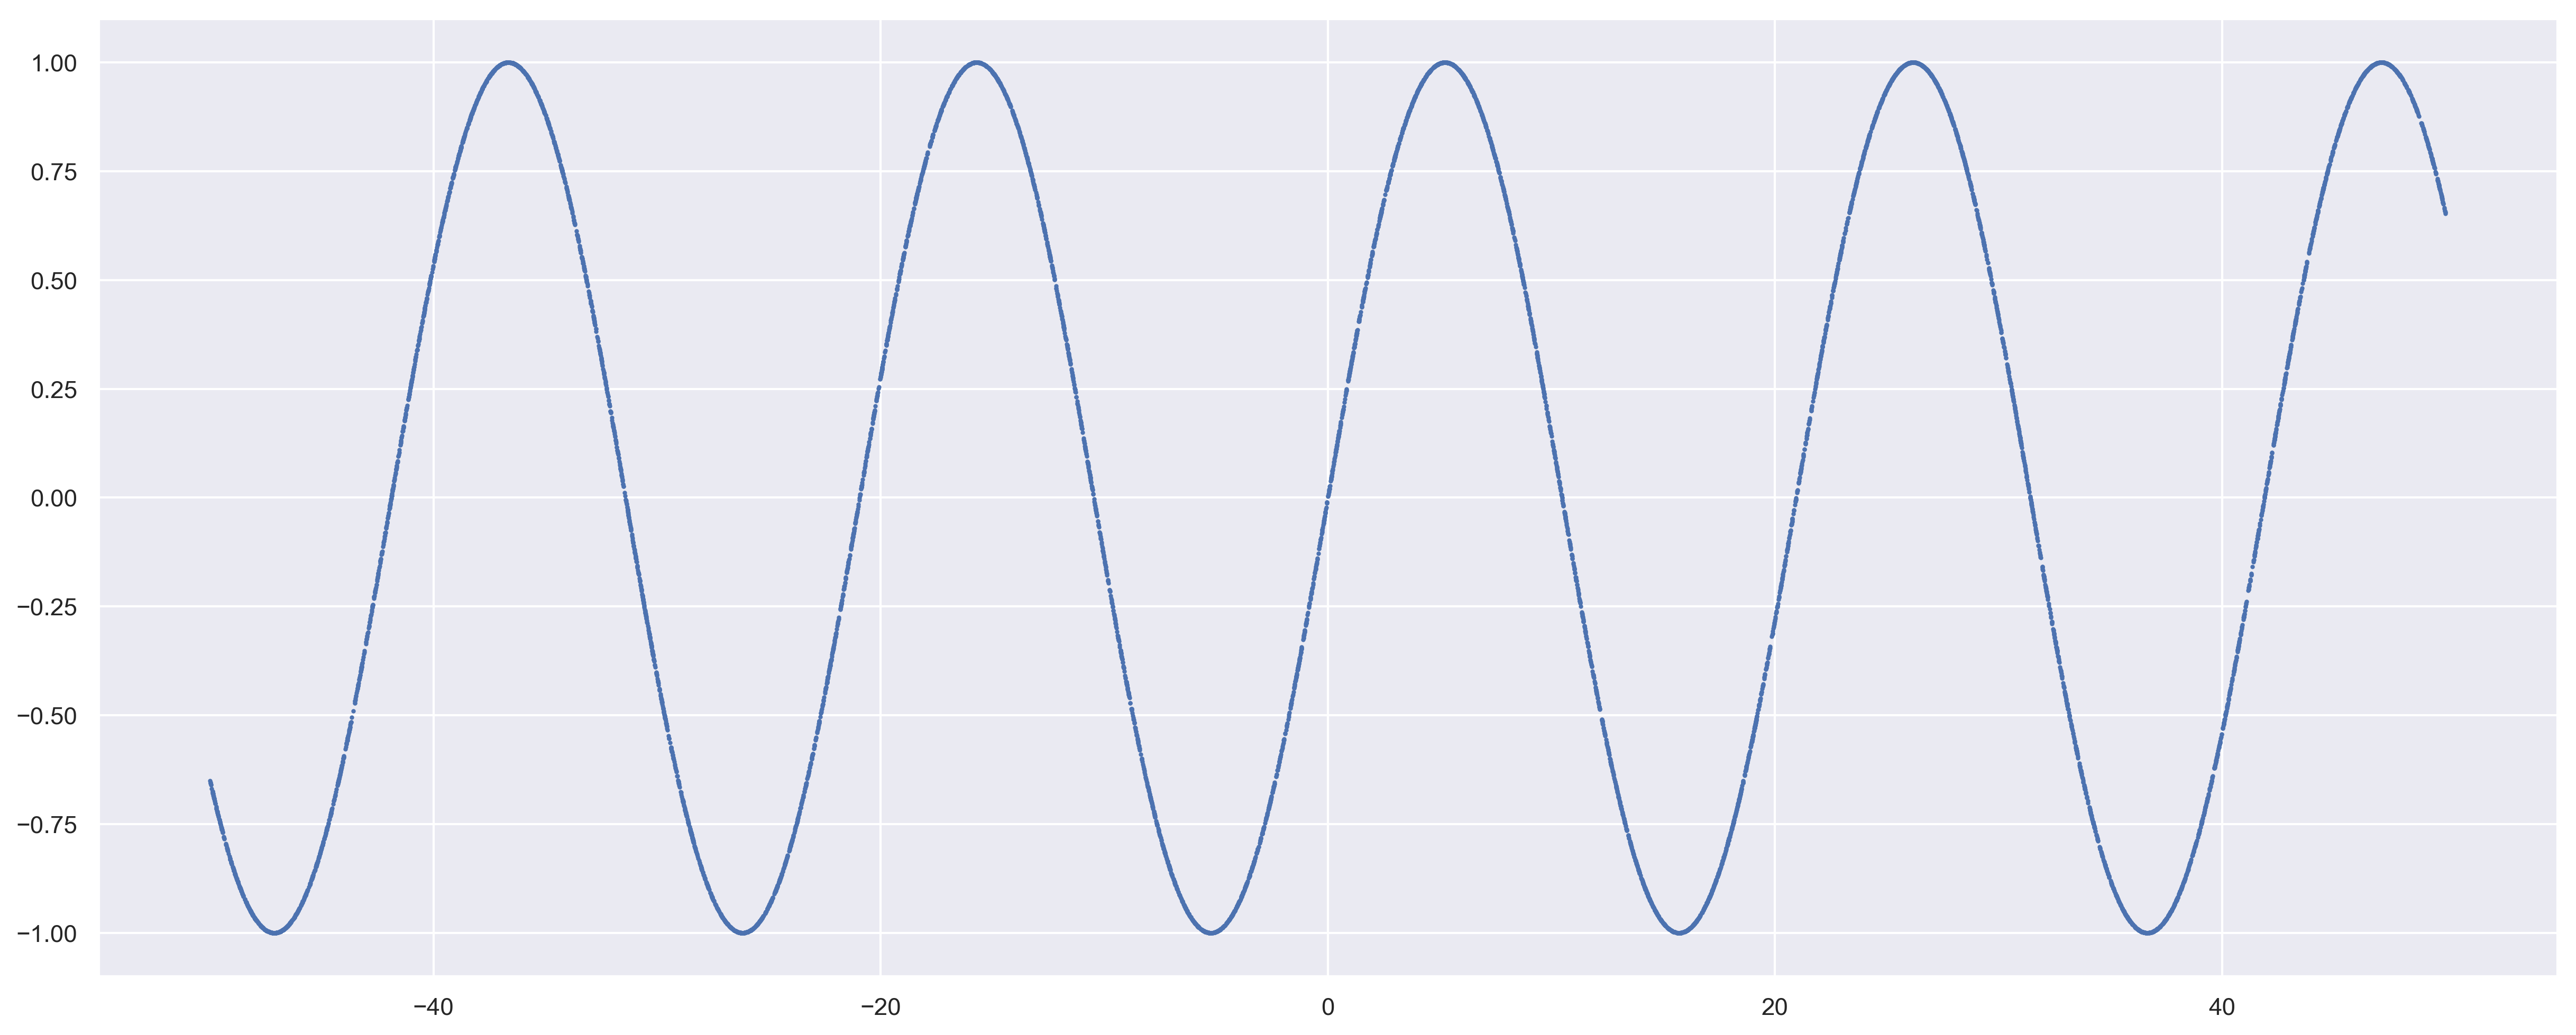

In [3]:
def get_y(x):
    return math.sin(0.3*x)

def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)
    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

training_data = sample_data()

# plot training data
fig, ax = plt.subplots(figsize=(20,8), dpi=300)
ax.scatter(training_data[:,0], training_data[:,1], s=1)

plt.show()

In [4]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [5]:
def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

In [6]:
def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

In [7]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

G_sample = generator(Z)
r_logits, r_rep = discriminator(X)
f_logits, g_rep = discriminator(G_sample,reuse=True)

disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")

gen_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars) # G Train step
disc_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars) # D Train step

Iterations: 0	 Discriminator loss: 4.1556	 Generator loss: 0.6998


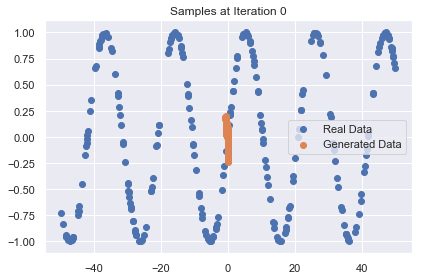

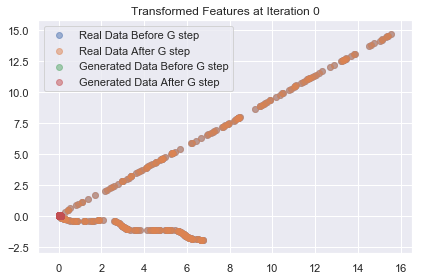

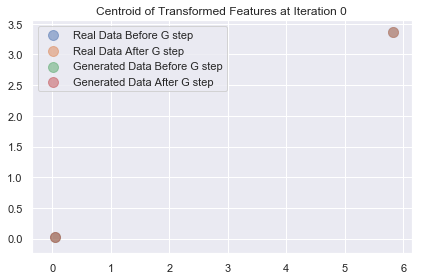

Iterations: 1	 Discriminator loss: 3.4089	 Generator loss: 0.6957
Iterations: 2	 Discriminator loss: 2.5219	 Generator loss: 0.6927
Iterations: 3	 Discriminator loss: 2.0160	 Generator loss: 0.6920
Iterations: 4	 Discriminator loss: 1.6525	 Generator loss: 0.6943
Iterations: 5	 Discriminator loss: 1.3055	 Generator loss: 0.7056
Iterations: 6	 Discriminator loss: 1.0161	 Generator loss: 0.7268
Iterations: 7	 Discriminator loss: 0.9120	 Generator loss: 0.7495
Iterations: 8	 Discriminator loss: 0.8034	 Generator loss: 0.7723
Iterations: 9	 Discriminator loss: 0.7887	 Generator loss: 0.7961
Iterations: 10	 Discriminator loss: 0.7060	 Generator loss: 0.8178
Iterations: 11	 Discriminator loss: 0.6737	 Generator loss: 0.8436
Iterations: 12	 Discriminator loss: 0.6482	 Generator loss: 0.8656
Iterations: 13	 Discriminator loss: 0.6066	 Generator loss: 0.8957
Iterations: 14	 Discriminator loss: 0.6093	 Generator loss: 0.9123
Iterations: 15	 Discriminator loss: 0.5620	 Generator loss: 0.9502
Iter

Iterations: 128	 Discriminator loss: 1.3842	 Generator loss: 0.6738
Iterations: 129	 Discriminator loss: 1.3645	 Generator loss: 0.7033
Iterations: 130	 Discriminator loss: 1.3919	 Generator loss: 0.6758
Iterations: 131	 Discriminator loss: 1.3874	 Generator loss: 0.6936
Iterations: 132	 Discriminator loss: 1.3776	 Generator loss: 0.6806
Iterations: 133	 Discriminator loss: 1.3693	 Generator loss: 0.6469
Iterations: 134	 Discriminator loss: 1.3664	 Generator loss: 0.6847
Iterations: 135	 Discriminator loss: 1.3386	 Generator loss: 0.7284
Iterations: 136	 Discriminator loss: 1.3335	 Generator loss: 0.6974
Iterations: 137	 Discriminator loss: 1.3842	 Generator loss: 0.7041
Iterations: 138	 Discriminator loss: 1.3593	 Generator loss: 0.7227
Iterations: 139	 Discriminator loss: 1.3678	 Generator loss: 0.6837
Iterations: 140	 Discriminator loss: 1.3735	 Generator loss: 0.7041
Iterations: 141	 Discriminator loss: 1.3753	 Generator loss: 0.6928
Iterations: 142	 Discriminator loss: 1.3690	 Gen

Iterations: 252	 Discriminator loss: 1.3924	 Generator loss: 0.6834
Iterations: 253	 Discriminator loss: 1.3601	 Generator loss: 0.6842
Iterations: 254	 Discriminator loss: 1.3853	 Generator loss: 0.7245
Iterations: 255	 Discriminator loss: 1.3745	 Generator loss: 0.7156
Iterations: 256	 Discriminator loss: 1.3797	 Generator loss: 0.6686
Iterations: 257	 Discriminator loss: 1.3860	 Generator loss: 0.7177
Iterations: 258	 Discriminator loss: 1.3434	 Generator loss: 0.7069
Iterations: 259	 Discriminator loss: 1.3554	 Generator loss: 0.7638
Iterations: 260	 Discriminator loss: 1.3765	 Generator loss: 0.6459
Iterations: 261	 Discriminator loss: 1.3820	 Generator loss: 0.6590
Iterations: 262	 Discriminator loss: 1.3782	 Generator loss: 0.7069
Iterations: 263	 Discriminator loss: 1.3648	 Generator loss: 0.6762
Iterations: 264	 Discriminator loss: 1.3816	 Generator loss: 0.7039
Iterations: 265	 Discriminator loss: 1.3837	 Generator loss: 0.7320
Iterations: 266	 Discriminator loss: 1.3808	 Gen

Iterations: 379	 Discriminator loss: 1.3766	 Generator loss: 0.6574
Iterations: 380	 Discriminator loss: 1.3801	 Generator loss: 0.6857
Iterations: 381	 Discriminator loss: 1.3831	 Generator loss: 0.6776
Iterations: 382	 Discriminator loss: 1.3758	 Generator loss: 0.6888
Iterations: 383	 Discriminator loss: 1.3812	 Generator loss: 0.6971
Iterations: 384	 Discriminator loss: 1.3775	 Generator loss: 0.7006
Iterations: 385	 Discriminator loss: 1.3749	 Generator loss: 0.6898
Iterations: 386	 Discriminator loss: 1.3792	 Generator loss: 0.6792
Iterations: 387	 Discriminator loss: 1.3737	 Generator loss: 0.6870
Iterations: 388	 Discriminator loss: 1.3819	 Generator loss: 0.7387
Iterations: 389	 Discriminator loss: 1.3706	 Generator loss: 0.6938
Iterations: 390	 Discriminator loss: 1.3825	 Generator loss: 0.6931
Iterations: 391	 Discriminator loss: 1.3703	 Generator loss: 0.6964
Iterations: 392	 Discriminator loss: 1.3817	 Generator loss: 0.7001
Iterations: 393	 Discriminator loss: 1.3737	 Gen

Iterations: 502	 Discriminator loss: 1.3738	 Generator loss: 0.6548
Iterations: 503	 Discriminator loss: 1.3660	 Generator loss: 0.7338
Iterations: 504	 Discriminator loss: 1.3635	 Generator loss: 0.7073
Iterations: 505	 Discriminator loss: 1.3778	 Generator loss: 0.7037
Iterations: 506	 Discriminator loss: 1.3816	 Generator loss: 0.6759
Iterations: 507	 Discriminator loss: 1.3768	 Generator loss: 0.6724
Iterations: 508	 Discriminator loss: 1.3881	 Generator loss: 0.7178
Iterations: 509	 Discriminator loss: 1.3667	 Generator loss: 0.6709
Iterations: 510	 Discriminator loss: 1.3835	 Generator loss: 0.7135
Iterations: 511	 Discriminator loss: 1.3779	 Generator loss: 0.6930
Iterations: 512	 Discriminator loss: 1.3822	 Generator loss: 0.6910
Iterations: 513	 Discriminator loss: 1.3765	 Generator loss: 0.7266
Iterations: 514	 Discriminator loss: 1.3738	 Generator loss: 0.7148
Iterations: 515	 Discriminator loss: 1.3743	 Generator loss: 0.6771
Iterations: 516	 Discriminator loss: 1.3756	 Gen

Iterations: 625	 Discriminator loss: 1.3655	 Generator loss: 0.6854
Iterations: 626	 Discriminator loss: 1.3807	 Generator loss: 0.6862
Iterations: 627	 Discriminator loss: 1.3738	 Generator loss: 0.6843
Iterations: 628	 Discriminator loss: 1.3777	 Generator loss: 0.6862
Iterations: 629	 Discriminator loss: 1.3813	 Generator loss: 0.6897
Iterations: 630	 Discriminator loss: 1.3754	 Generator loss: 0.6896
Iterations: 631	 Discriminator loss: 1.3795	 Generator loss: 0.6692
Iterations: 632	 Discriminator loss: 1.3823	 Generator loss: 0.7219
Iterations: 633	 Discriminator loss: 1.3847	 Generator loss: 0.6915
Iterations: 634	 Discriminator loss: 1.3780	 Generator loss: 0.6885
Iterations: 635	 Discriminator loss: 1.3662	 Generator loss: 0.6833
Iterations: 636	 Discriminator loss: 1.3587	 Generator loss: 0.6450
Iterations: 637	 Discriminator loss: 1.3820	 Generator loss: 0.6864
Iterations: 638	 Discriminator loss: 1.3804	 Generator loss: 0.6863
Iterations: 639	 Discriminator loss: 1.3674	 Gen

Iterations: 745	 Discriminator loss: 1.3667	 Generator loss: 0.6740
Iterations: 746	 Discriminator loss: 1.3618	 Generator loss: 0.7303
Iterations: 747	 Discriminator loss: 1.3599	 Generator loss: 0.6772
Iterations: 748	 Discriminator loss: 1.3276	 Generator loss: 0.6755
Iterations: 749	 Discriminator loss: 1.3534	 Generator loss: 0.6664
Iterations: 750	 Discriminator loss: 1.3885	 Generator loss: 0.6955
Iterations: 751	 Discriminator loss: 1.3201	 Generator loss: 0.6443
Iterations: 752	 Discriminator loss: 1.3813	 Generator loss: 0.6542
Iterations: 753	 Discriminator loss: 1.4013	 Generator loss: 0.7420
Iterations: 754	 Discriminator loss: 1.3140	 Generator loss: 0.6888
Iterations: 755	 Discriminator loss: 1.3604	 Generator loss: 0.6899
Iterations: 756	 Discriminator loss: 1.3607	 Generator loss: 0.6406
Iterations: 757	 Discriminator loss: 1.3450	 Generator loss: 0.6617
Iterations: 758	 Discriminator loss: 1.3580	 Generator loss: 0.6930
Iterations: 759	 Discriminator loss: 1.3579	 Gen

Iterations: 870	 Discriminator loss: 1.4080	 Generator loss: 0.6913
Iterations: 871	 Discriminator loss: 1.3295	 Generator loss: 0.6417
Iterations: 872	 Discriminator loss: 1.3606	 Generator loss: 0.6273
Iterations: 873	 Discriminator loss: 1.2824	 Generator loss: 0.7553
Iterations: 874	 Discriminator loss: 1.3335	 Generator loss: 0.6518
Iterations: 875	 Discriminator loss: 1.3623	 Generator loss: 0.6639
Iterations: 876	 Discriminator loss: 1.3160	 Generator loss: 0.5868
Iterations: 877	 Discriminator loss: 1.3578	 Generator loss: 0.7323
Iterations: 878	 Discriminator loss: 1.2928	 Generator loss: 0.6543
Iterations: 879	 Discriminator loss: 1.3856	 Generator loss: 0.6981
Iterations: 880	 Discriminator loss: 1.3648	 Generator loss: 0.7187
Iterations: 881	 Discriminator loss: 1.3219	 Generator loss: 0.5941
Iterations: 882	 Discriminator loss: 1.3591	 Generator loss: 0.7079
Iterations: 883	 Discriminator loss: 1.2607	 Generator loss: 0.6787
Iterations: 884	 Discriminator loss: 1.3119	 Gen

Iterations: 993	 Discriminator loss: 1.3291	 Generator loss: 0.7001
Iterations: 994	 Discriminator loss: 1.2865	 Generator loss: 0.5062
Iterations: 995	 Discriminator loss: 1.3591	 Generator loss: 0.6961
Iterations: 996	 Discriminator loss: 1.2687	 Generator loss: 0.6000
Iterations: 997	 Discriminator loss: 1.3763	 Generator loss: 0.6822
Iterations: 998	 Discriminator loss: 1.3447	 Generator loss: 0.6638
Iterations: 999	 Discriminator loss: 1.3467	 Generator loss: 0.5774
Iterations: 1000	 Discriminator loss: 1.2766	 Generator loss: 0.6489


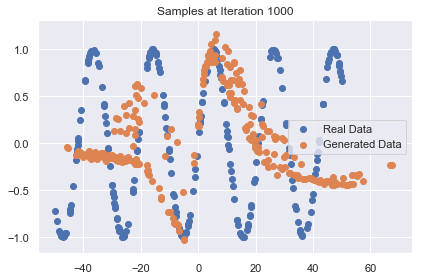

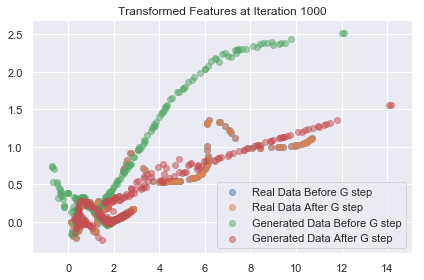

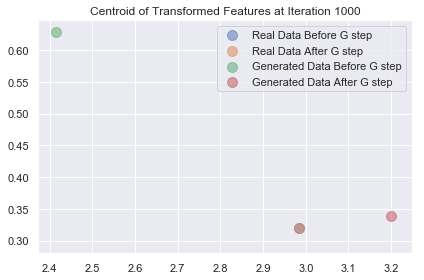

Iterations: 1001	 Discriminator loss: 1.3798	 Generator loss: 0.7070
Iterations: 1002	 Discriminator loss: 1.3510	 Generator loss: 0.6880
Iterations: 1003	 Discriminator loss: 1.2836	 Generator loss: 0.5559
Iterations: 1004	 Discriminator loss: 1.3057	 Generator loss: 0.7200
Iterations: 1005	 Discriminator loss: 1.2913	 Generator loss: 0.5853
Iterations: 1006	 Discriminator loss: 1.3535	 Generator loss: 0.6987
Iterations: 1007	 Discriminator loss: 1.3175	 Generator loss: 0.5855
Iterations: 1008	 Discriminator loss: 1.3310	 Generator loss: 0.6939
Iterations: 1009	 Discriminator loss: 1.3598	 Generator loss: 0.6961
Iterations: 1010	 Discriminator loss: 1.3129	 Generator loss: 0.6416
Iterations: 1011	 Discriminator loss: 1.3190	 Generator loss: 0.6346
Iterations: 1012	 Discriminator loss: 1.3328	 Generator loss: 0.6737
Iterations: 1013	 Discriminator loss: 1.3359	 Generator loss: 0.6094
Iterations: 1014	 Discriminator loss: 1.3386	 Generator loss: 0.7475
Iterations: 1015	 Discriminator lo

Iterations: 1120	 Discriminator loss: 1.3214	 Generator loss: 0.5864
Iterations: 1121	 Discriminator loss: 1.2831	 Generator loss: 0.6904
Iterations: 1122	 Discriminator loss: 1.3815	 Generator loss: 0.6785
Iterations: 1123	 Discriminator loss: 1.3271	 Generator loss: 0.6542
Iterations: 1124	 Discriminator loss: 1.3319	 Generator loss: 0.7005
Iterations: 1125	 Discriminator loss: 1.3655	 Generator loss: 0.7157
Iterations: 1126	 Discriminator loss: 1.3470	 Generator loss: 0.6608
Iterations: 1127	 Discriminator loss: 1.3136	 Generator loss: 0.6728
Iterations: 1128	 Discriminator loss: 1.3621	 Generator loss: 0.7374
Iterations: 1129	 Discriminator loss: 1.3462	 Generator loss: 0.6276
Iterations: 1130	 Discriminator loss: 1.2515	 Generator loss: 0.6604
Iterations: 1131	 Discriminator loss: 1.3792	 Generator loss: 0.7295
Iterations: 1132	 Discriminator loss: 1.3516	 Generator loss: 0.6485
Iterations: 1133	 Discriminator loss: 1.3720	 Generator loss: 0.6982
Iterations: 1134	 Discriminator lo

Iterations: 1244	 Discriminator loss: 1.3444	 Generator loss: 0.6133
Iterations: 1245	 Discriminator loss: 1.3219	 Generator loss: 0.6666
Iterations: 1246	 Discriminator loss: 1.2878	 Generator loss: 0.5990
Iterations: 1247	 Discriminator loss: 1.3265	 Generator loss: 0.6674
Iterations: 1248	 Discriminator loss: 1.3283	 Generator loss: 0.6224
Iterations: 1249	 Discriminator loss: 1.3302	 Generator loss: 0.6765
Iterations: 1250	 Discriminator loss: 1.2919	 Generator loss: 0.6336
Iterations: 1251	 Discriminator loss: 1.3045	 Generator loss: 0.6737
Iterations: 1252	 Discriminator loss: 1.3229	 Generator loss: 0.6801
Iterations: 1253	 Discriminator loss: 1.3241	 Generator loss: 0.7200
Iterations: 1254	 Discriminator loss: 1.3389	 Generator loss: 0.6212
Iterations: 1255	 Discriminator loss: 1.2920	 Generator loss: 0.6384
Iterations: 1256	 Discriminator loss: 1.3177	 Generator loss: 0.6660
Iterations: 1257	 Discriminator loss: 1.3455	 Generator loss: 0.6662
Iterations: 1258	 Discriminator lo

Iterations: 1365	 Discriminator loss: 1.3271	 Generator loss: 0.5915
Iterations: 1366	 Discriminator loss: 1.2974	 Generator loss: 0.6737
Iterations: 1367	 Discriminator loss: 1.3518	 Generator loss: 0.6488
Iterations: 1368	 Discriminator loss: 1.3011	 Generator loss: 0.6646
Iterations: 1369	 Discriminator loss: 1.2897	 Generator loss: 0.6047
Iterations: 1370	 Discriminator loss: 1.3129	 Generator loss: 0.6732
Iterations: 1371	 Discriminator loss: 1.3197	 Generator loss: 0.7094
Iterations: 1372	 Discriminator loss: 1.2814	 Generator loss: 0.5831
Iterations: 1373	 Discriminator loss: 1.2702	 Generator loss: 0.6662
Iterations: 1374	 Discriminator loss: 1.3410	 Generator loss: 0.6814
Iterations: 1375	 Discriminator loss: 1.3889	 Generator loss: 0.7163
Iterations: 1376	 Discriminator loss: 1.3296	 Generator loss: 0.6817
Iterations: 1377	 Discriminator loss: 1.2992	 Generator loss: 0.5467
Iterations: 1378	 Discriminator loss: 1.2947	 Generator loss: 0.6824
Iterations: 1379	 Discriminator lo

Iterations: 1488	 Discriminator loss: 1.3018	 Generator loss: 0.6358
Iterations: 1489	 Discriminator loss: 1.3214	 Generator loss: 0.6471
Iterations: 1490	 Discriminator loss: 1.2877	 Generator loss: 0.5707
Iterations: 1491	 Discriminator loss: 1.3089	 Generator loss: 0.6915
Iterations: 1492	 Discriminator loss: 1.3120	 Generator loss: 0.6680
Iterations: 1493	 Discriminator loss: 1.2822	 Generator loss: 0.6511
Iterations: 1494	 Discriminator loss: 1.3336	 Generator loss: 0.6495
Iterations: 1495	 Discriminator loss: 1.3287	 Generator loss: 0.6754
Iterations: 1496	 Discriminator loss: 1.2825	 Generator loss: 0.5374
Iterations: 1497	 Discriminator loss: 1.3153	 Generator loss: 0.7077
Iterations: 1498	 Discriminator loss: 1.2872	 Generator loss: 0.7259
Iterations: 1499	 Discriminator loss: 1.3482	 Generator loss: 0.7153
Iterations: 1500	 Discriminator loss: 1.3525	 Generator loss: 0.7285
Iterations: 1501	 Discriminator loss: 1.3322	 Generator loss: 0.5678
Iterations: 1502	 Discriminator lo

Iterations: 1610	 Discriminator loss: 1.3209	 Generator loss: 0.7547
Iterations: 1611	 Discriminator loss: 1.2772	 Generator loss: 0.6455
Iterations: 1612	 Discriminator loss: 1.3177	 Generator loss: 0.6246
Iterations: 1613	 Discriminator loss: 1.3406	 Generator loss: 0.7224
Iterations: 1614	 Discriminator loss: 1.3128	 Generator loss: 0.5947
Iterations: 1615	 Discriminator loss: 1.2996	 Generator loss: 0.8013
Iterations: 1616	 Discriminator loss: 1.2855	 Generator loss: 0.6426
Iterations: 1617	 Discriminator loss: 1.2821	 Generator loss: 0.5835
Iterations: 1618	 Discriminator loss: 1.2942	 Generator loss: 0.6215
Iterations: 1619	 Discriminator loss: 1.3657	 Generator loss: 0.7460
Iterations: 1620	 Discriminator loss: 1.2579	 Generator loss: 0.5375
Iterations: 1621	 Discriminator loss: 1.3494	 Generator loss: 0.7710
Iterations: 1622	 Discriminator loss: 1.2781	 Generator loss: 0.5954
Iterations: 1623	 Discriminator loss: 1.2868	 Generator loss: 0.6318
Iterations: 1624	 Discriminator lo

Iterations: 1733	 Discriminator loss: 1.2384	 Generator loss: 0.8339
Iterations: 1734	 Discriminator loss: 1.2326	 Generator loss: 0.5313
Iterations: 1735	 Discriminator loss: 1.3143	 Generator loss: 0.6144
Iterations: 1736	 Discriminator loss: 1.3593	 Generator loss: 0.5342
Iterations: 1737	 Discriminator loss: 1.2295	 Generator loss: 0.5676
Iterations: 1738	 Discriminator loss: 1.3468	 Generator loss: 0.6259
Iterations: 1739	 Discriminator loss: 1.2184	 Generator loss: 0.5444
Iterations: 1740	 Discriminator loss: 1.2726	 Generator loss: 0.7206
Iterations: 1741	 Discriminator loss: 1.2472	 Generator loss: 0.5423
Iterations: 1742	 Discriminator loss: 1.2085	 Generator loss: 0.5853
Iterations: 1743	 Discriminator loss: 1.2506	 Generator loss: 0.5927
Iterations: 1744	 Discriminator loss: 1.3366	 Generator loss: 0.7013
Iterations: 1745	 Discriminator loss: 1.1825	 Generator loss: 0.4973
Iterations: 1746	 Discriminator loss: 1.2821	 Generator loss: 0.7347
Iterations: 1747	 Discriminator lo

Iterations: 1858	 Discriminator loss: 1.2864	 Generator loss: 0.6151
Iterations: 1859	 Discriminator loss: 1.2530	 Generator loss: 0.5836
Iterations: 1860	 Discriminator loss: 1.2184	 Generator loss: 0.5401
Iterations: 1861	 Discriminator loss: 1.3340	 Generator loss: 0.6408
Iterations: 1862	 Discriminator loss: 1.2680	 Generator loss: 0.6291
Iterations: 1863	 Discriminator loss: 1.2158	 Generator loss: 0.5195
Iterations: 1864	 Discriminator loss: 1.2240	 Generator loss: 0.8666
Iterations: 1865	 Discriminator loss: 1.2002	 Generator loss: 0.5144
Iterations: 1866	 Discriminator loss: 1.2230	 Generator loss: 0.5856
Iterations: 1867	 Discriminator loss: 1.3564	 Generator loss: 0.6929
Iterations: 1868	 Discriminator loss: 1.2847	 Generator loss: 0.5737
Iterations: 1869	 Discriminator loss: 1.2429	 Generator loss: 0.5667
Iterations: 1870	 Discriminator loss: 1.2584	 Generator loss: 0.6068
Iterations: 1871	 Discriminator loss: 1.2612	 Generator loss: 0.5927
Iterations: 1872	 Discriminator lo

Iterations: 1983	 Discriminator loss: 1.2677	 Generator loss: 0.6345
Iterations: 1984	 Discriminator loss: 1.3320	 Generator loss: 0.6033
Iterations: 1985	 Discriminator loss: 1.1913	 Generator loss: 0.5628
Iterations: 1986	 Discriminator loss: 1.2390	 Generator loss: 0.6999
Iterations: 1987	 Discriminator loss: 1.2700	 Generator loss: 0.5542
Iterations: 1988	 Discriminator loss: 1.3209	 Generator loss: 0.6180
Iterations: 1989	 Discriminator loss: 1.2200	 Generator loss: 0.5682
Iterations: 1990	 Discriminator loss: 1.3111	 Generator loss: 0.6585
Iterations: 1991	 Discriminator loss: 1.2231	 Generator loss: 0.5822
Iterations: 1992	 Discriminator loss: 1.2862	 Generator loss: 0.6702
Iterations: 1993	 Discriminator loss: 1.2721	 Generator loss: 0.6350
Iterations: 1994	 Discriminator loss: 1.2556	 Generator loss: 0.5768
Iterations: 1995	 Discriminator loss: 1.2879	 Generator loss: 0.7929
Iterations: 1996	 Discriminator loss: 1.1906	 Generator loss: 0.5827
Iterations: 1997	 Discriminator lo

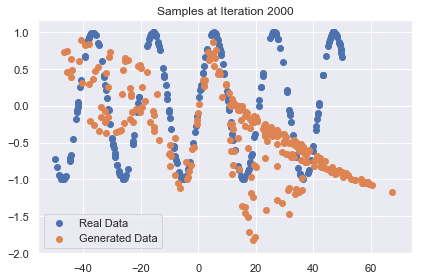

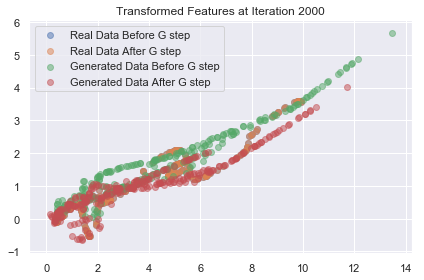

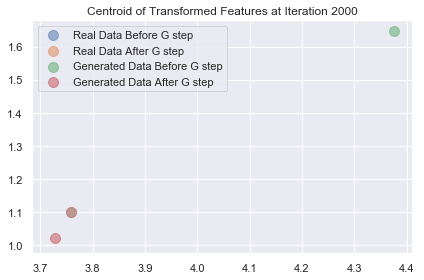

Iterations: 2001	 Discriminator loss: 1.1630	 Generator loss: 0.5778
Iterations: 2002	 Discriminator loss: 1.2971	 Generator loss: 0.6515
Iterations: 2003	 Discriminator loss: 1.1705	 Generator loss: 0.5587
Iterations: 2004	 Discriminator loss: 1.2642	 Generator loss: 0.6075
Iterations: 2005	 Discriminator loss: 1.2258	 Generator loss: 0.5984
Iterations: 2006	 Discriminator loss: 1.2472	 Generator loss: 0.5836
Iterations: 2007	 Discriminator loss: 1.2015	 Generator loss: 0.5564
Iterations: 2008	 Discriminator loss: 1.2662	 Generator loss: 0.6525
Iterations: 2009	 Discriminator loss: 1.3438	 Generator loss: 0.6020
Iterations: 2010	 Discriminator loss: 1.1953	 Generator loss: 0.8225
Iterations: 2011	 Discriminator loss: 1.2553	 Generator loss: 0.5923
Iterations: 2012	 Discriminator loss: 1.2265	 Generator loss: 0.5625
Iterations: 2013	 Discriminator loss: 1.2233	 Generator loss: 0.6197
Iterations: 2014	 Discriminator loss: 1.2291	 Generator loss: 0.5837
Iterations: 2015	 Discriminator lo

Iterations: 2126	 Discriminator loss: 1.2764	 Generator loss: 0.6232
Iterations: 2127	 Discriminator loss: 1.1389	 Generator loss: 0.5842
Iterations: 2128	 Discriminator loss: 1.2846	 Generator loss: 0.6671
Iterations: 2129	 Discriminator loss: 1.1635	 Generator loss: 0.5875
Iterations: 2130	 Discriminator loss: 1.1841	 Generator loss: 0.5716
Iterations: 2131	 Discriminator loss: 1.2368	 Generator loss: 0.6290
Iterations: 2132	 Discriminator loss: 1.2199	 Generator loss: 0.5853
Iterations: 2133	 Discriminator loss: 1.1660	 Generator loss: 0.5786
Iterations: 2134	 Discriminator loss: 1.1961	 Generator loss: 0.6428
Iterations: 2135	 Discriminator loss: 1.3061	 Generator loss: 0.6607
Iterations: 2136	 Discriminator loss: 1.2917	 Generator loss: 0.7200
Iterations: 2137	 Discriminator loss: 1.1489	 Generator loss: 0.4749
Iterations: 2138	 Discriminator loss: 1.3118	 Generator loss: 0.7128
Iterations: 2139	 Discriminator loss: 1.2454	 Generator loss: 0.7825
Iterations: 2140	 Discriminator lo

Iterations: 2246	 Discriminator loss: 1.2150	 Generator loss: 0.6095
Iterations: 2247	 Discriminator loss: 1.1936	 Generator loss: 0.6012
Iterations: 2248	 Discriminator loss: 1.2113	 Generator loss: 0.5919
Iterations: 2249	 Discriminator loss: 1.1661	 Generator loss: 0.8151
Iterations: 2250	 Discriminator loss: 1.2523	 Generator loss: 0.6351
Iterations: 2251	 Discriminator loss: 1.2599	 Generator loss: 0.6050
Iterations: 2252	 Discriminator loss: 1.2086	 Generator loss: 0.7892
Iterations: 2253	 Discriminator loss: 1.1982	 Generator loss: 0.8520
Iterations: 2254	 Discriminator loss: 1.1934	 Generator loss: 0.5660
Iterations: 2255	 Discriminator loss: 1.1824	 Generator loss: 0.6207
Iterations: 2256	 Discriminator loss: 1.2945	 Generator loss: 0.6085
Iterations: 2257	 Discriminator loss: 1.1805	 Generator loss: 0.8824
Iterations: 2258	 Discriminator loss: 1.1780	 Generator loss: 0.5620
Iterations: 2259	 Discriminator loss: 1.1801	 Generator loss: 0.5930
Iterations: 2260	 Discriminator lo

Iterations: 2367	 Discriminator loss: 1.1930	 Generator loss: 0.5780
Iterations: 2368	 Discriminator loss: 1.3289	 Generator loss: 0.7089
Iterations: 2369	 Discriminator loss: 1.2659	 Generator loss: 0.6317
Iterations: 2370	 Discriminator loss: 1.1081	 Generator loss: 0.5867
Iterations: 2371	 Discriminator loss: 1.2617	 Generator loss: 0.7497
Iterations: 2372	 Discriminator loss: 1.3064	 Generator loss: 0.6302
Iterations: 2373	 Discriminator loss: 1.1843	 Generator loss: 0.5666
Iterations: 2374	 Discriminator loss: 1.1829	 Generator loss: 0.5756
Iterations: 2375	 Discriminator loss: 1.1311	 Generator loss: 0.6023
Iterations: 2376	 Discriminator loss: 1.2358	 Generator loss: 0.6302
Iterations: 2377	 Discriminator loss: 1.2758	 Generator loss: 0.7098
Iterations: 2378	 Discriminator loss: 1.2493	 Generator loss: 0.5431
Iterations: 2379	 Discriminator loss: 1.1674	 Generator loss: 0.6006
Iterations: 2380	 Discriminator loss: 1.1328	 Generator loss: 0.5918
Iterations: 2381	 Discriminator lo

Iterations: 2492	 Discriminator loss: 1.2497	 Generator loss: 0.6936
Iterations: 2493	 Discriminator loss: 1.2542	 Generator loss: 0.7400
Iterations: 2494	 Discriminator loss: 1.3162	 Generator loss: 0.7251
Iterations: 2495	 Discriminator loss: 1.2999	 Generator loss: 0.7258
Iterations: 2496	 Discriminator loss: 1.3050	 Generator loss: 0.7324
Iterations: 2497	 Discriminator loss: 1.2522	 Generator loss: 0.7443
Iterations: 2498	 Discriminator loss: 1.2757	 Generator loss: 0.7340
Iterations: 2499	 Discriminator loss: 1.3027	 Generator loss: 0.7253
Iterations: 2500	 Discriminator loss: 1.2779	 Generator loss: 0.7300
Iterations: 2501	 Discriminator loss: 1.2597	 Generator loss: 0.6809
Iterations: 2502	 Discriminator loss: 1.2456	 Generator loss: 0.6205
Iterations: 2503	 Discriminator loss: 1.2318	 Generator loss: 0.7656
Iterations: 2504	 Discriminator loss: 1.3285	 Generator loss: 0.7244
Iterations: 2505	 Discriminator loss: 1.2937	 Generator loss: 0.7276
Iterations: 2506	 Discriminator lo

Iterations: 2611	 Discriminator loss: 1.3462	 Generator loss: 0.9042
Iterations: 2612	 Discriminator loss: 1.2687	 Generator loss: 0.9766
Iterations: 2613	 Discriminator loss: 1.2875	 Generator loss: 0.8585
Iterations: 2614	 Discriminator loss: 1.2879	 Generator loss: 0.8483
Iterations: 2615	 Discriminator loss: 1.2666	 Generator loss: 0.9255
Iterations: 2616	 Discriminator loss: 1.3078	 Generator loss: 0.8729
Iterations: 2617	 Discriminator loss: 1.2908	 Generator loss: 0.9582
Iterations: 2618	 Discriminator loss: 1.2572	 Generator loss: 0.8654
Iterations: 2619	 Discriminator loss: 1.3225	 Generator loss: 0.8748
Iterations: 2620	 Discriminator loss: 1.3078	 Generator loss: 0.8400
Iterations: 2621	 Discriminator loss: 1.3050	 Generator loss: 0.9057
Iterations: 2622	 Discriminator loss: 1.3055	 Generator loss: 0.9377
Iterations: 2623	 Discriminator loss: 1.2919	 Generator loss: 0.8834
Iterations: 2624	 Discriminator loss: 1.2888	 Generator loss: 0.8088
Iterations: 2625	 Discriminator lo

Iterations: 2729	 Discriminator loss: 1.3151	 Generator loss: 0.7481
Iterations: 2730	 Discriminator loss: 1.2934	 Generator loss: 0.7413
Iterations: 2731	 Discriminator loss: 1.2996	 Generator loss: 0.7339
Iterations: 2732	 Discriminator loss: 1.3147	 Generator loss: 0.7116
Iterations: 2733	 Discriminator loss: 1.3104	 Generator loss: 0.7528
Iterations: 2734	 Discriminator loss: 1.2859	 Generator loss: 0.7501
Iterations: 2735	 Discriminator loss: 1.3185	 Generator loss: 0.7229
Iterations: 2736	 Discriminator loss: 1.3224	 Generator loss: 0.7485
Iterations: 2737	 Discriminator loss: 1.2975	 Generator loss: 0.7602
Iterations: 2738	 Discriminator loss: 1.3136	 Generator loss: 0.7294
Iterations: 2739	 Discriminator loss: 1.3147	 Generator loss: 0.7022
Iterations: 2740	 Discriminator loss: 1.2748	 Generator loss: 0.7468
Iterations: 2741	 Discriminator loss: 1.2785	 Generator loss: 0.7513
Iterations: 2742	 Discriminator loss: 1.3389	 Generator loss: 0.7257
Iterations: 2743	 Discriminator lo

Iterations: 2851	 Discriminator loss: 1.3380	 Generator loss: 0.7214
Iterations: 2852	 Discriminator loss: 1.3165	 Generator loss: 0.7051
Iterations: 2853	 Discriminator loss: 1.3087	 Generator loss: 0.8082
Iterations: 2854	 Discriminator loss: 1.3161	 Generator loss: 0.7295
Iterations: 2855	 Discriminator loss: 1.3343	 Generator loss: 0.7245
Iterations: 2856	 Discriminator loss: 1.3269	 Generator loss: 0.7147
Iterations: 2857	 Discriminator loss: 1.2818	 Generator loss: 0.6893
Iterations: 2858	 Discriminator loss: 1.3205	 Generator loss: 0.7189
Iterations: 2859	 Discriminator loss: 1.3002	 Generator loss: 0.6944
Iterations: 2860	 Discriminator loss: 1.3272	 Generator loss: 0.7097
Iterations: 2861	 Discriminator loss: 1.3201	 Generator loss: 0.7541
Iterations: 2862	 Discriminator loss: 1.3278	 Generator loss: 0.7215
Iterations: 2863	 Discriminator loss: 1.3418	 Generator loss: 0.7104
Iterations: 2864	 Discriminator loss: 1.3169	 Generator loss: 0.6644
Iterations: 2865	 Discriminator lo

Iterations: 2979	 Discriminator loss: 1.3569	 Generator loss: 0.8151
Iterations: 2980	 Discriminator loss: 1.3126	 Generator loss: 0.7733
Iterations: 2981	 Discriminator loss: 1.3254	 Generator loss: 0.7856
Iterations: 2982	 Discriminator loss: 1.2717	 Generator loss: 0.6779
Iterations: 2983	 Discriminator loss: 1.3544	 Generator loss: 0.8114
Iterations: 2984	 Discriminator loss: 1.3210	 Generator loss: 0.7580
Iterations: 2985	 Discriminator loss: 1.3228	 Generator loss: 0.7869
Iterations: 2986	 Discriminator loss: 1.2953	 Generator loss: 0.7642
Iterations: 2987	 Discriminator loss: 1.3044	 Generator loss: 0.7926
Iterations: 2988	 Discriminator loss: 1.3440	 Generator loss: 0.7595
Iterations: 2989	 Discriminator loss: 1.3477	 Generator loss: 0.7497
Iterations: 2990	 Discriminator loss: 1.2875	 Generator loss: 0.8046
Iterations: 2991	 Discriminator loss: 1.3123	 Generator loss: 0.7473
Iterations: 2992	 Discriminator loss: 1.2783	 Generator loss: 0.7314
Iterations: 2993	 Discriminator lo

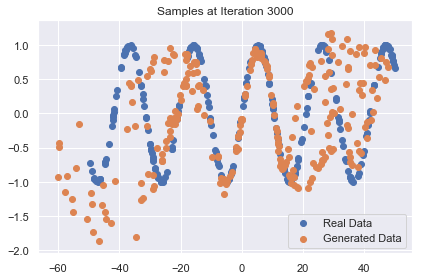

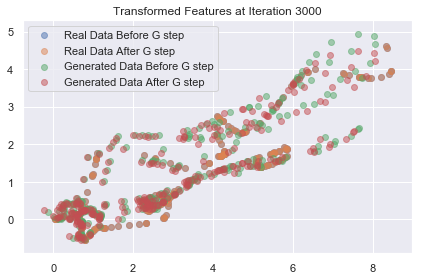

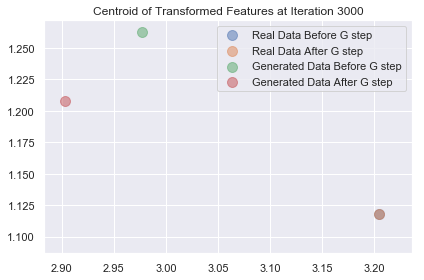

Iterations: 3001	 Discriminator loss: 1.3410	 Generator loss: 0.8072
Iterations: 3002	 Discriminator loss: 1.3020	 Generator loss: 0.7698
Iterations: 3003	 Discriminator loss: 1.2858	 Generator loss: 0.7872
Iterations: 3004	 Discriminator loss: 1.3663	 Generator loss: 0.7861
Iterations: 3005	 Discriminator loss: 1.3424	 Generator loss: 0.7536
Iterations: 3006	 Discriminator loss: 1.3108	 Generator loss: 0.7556
Iterations: 3007	 Discriminator loss: 1.3710	 Generator loss: 0.8231
Iterations: 3008	 Discriminator loss: 1.3201	 Generator loss: 0.7518
Iterations: 3009	 Discriminator loss: 1.3008	 Generator loss: 0.7659
Iterations: 3010	 Discriminator loss: 1.2873	 Generator loss: 0.6872
Iterations: 3011	 Discriminator loss: 1.2978	 Generator loss: 0.7526
Iterations: 3012	 Discriminator loss: 1.3192	 Generator loss: 0.8267
Iterations: 3013	 Discriminator loss: 1.2943	 Generator loss: 0.6764
Iterations: 3014	 Discriminator loss: 1.3212	 Generator loss: 0.7609
Iterations: 3015	 Discriminator lo

Iterations: 3124	 Discriminator loss: 1.3546	 Generator loss: 0.7144
Iterations: 3125	 Discriminator loss: 1.3513	 Generator loss: 0.7493
Iterations: 3126	 Discriminator loss: 1.3466	 Generator loss: 0.7627
Iterations: 3127	 Discriminator loss: 1.3173	 Generator loss: 0.7741
Iterations: 3128	 Discriminator loss: 1.3482	 Generator loss: 0.8165
Iterations: 3129	 Discriminator loss: 1.3238	 Generator loss: 0.7313
Iterations: 3130	 Discriminator loss: 1.3561	 Generator loss: 0.7478
Iterations: 3131	 Discriminator loss: 1.3544	 Generator loss: 0.7609
Iterations: 3132	 Discriminator loss: 1.3100	 Generator loss: 0.7558
Iterations: 3133	 Discriminator loss: 1.3592	 Generator loss: 0.7221
Iterations: 3134	 Discriminator loss: 1.3612	 Generator loss: 0.7340
Iterations: 3135	 Discriminator loss: 1.3262	 Generator loss: 0.7564
Iterations: 3136	 Discriminator loss: 1.3255	 Generator loss: 0.7532
Iterations: 3137	 Discriminator loss: 1.3031	 Generator loss: 0.7245
Iterations: 3138	 Discriminator lo

Iterations: 3246	 Discriminator loss: 1.3174	 Generator loss: 0.6818
Iterations: 3247	 Discriminator loss: 1.2914	 Generator loss: 0.7381
Iterations: 3248	 Discriminator loss: 1.3413	 Generator loss: 0.6909
Iterations: 3249	 Discriminator loss: 1.3414	 Generator loss: 0.7397
Iterations: 3250	 Discriminator loss: 1.3295	 Generator loss: 0.7106
Iterations: 3251	 Discriminator loss: 1.3318	 Generator loss: 0.6905
Iterations: 3252	 Discriminator loss: 1.3256	 Generator loss: 0.7181
Iterations: 3253	 Discriminator loss: 1.3223	 Generator loss: 0.7164
Iterations: 3254	 Discriminator loss: 1.3537	 Generator loss: 0.7183
Iterations: 3255	 Discriminator loss: 1.3024	 Generator loss: 0.6765
Iterations: 3256	 Discriminator loss: 1.3183	 Generator loss: 0.7019
Iterations: 3257	 Discriminator loss: 1.2969	 Generator loss: 0.6777
Iterations: 3258	 Discriminator loss: 1.3130	 Generator loss: 0.6979
Iterations: 3259	 Discriminator loss: 1.3266	 Generator loss: 0.7201
Iterations: 3260	 Discriminator lo

Iterations: 3368	 Discriminator loss: 1.3266	 Generator loss: 0.7716
Iterations: 3369	 Discriminator loss: 1.3228	 Generator loss: 0.7184
Iterations: 3370	 Discriminator loss: 1.3246	 Generator loss: 0.7205
Iterations: 3371	 Discriminator loss: 1.2921	 Generator loss: 0.7248
Iterations: 3372	 Discriminator loss: 1.3210	 Generator loss: 0.7342
Iterations: 3373	 Discriminator loss: 1.3251	 Generator loss: 0.7109
Iterations: 3374	 Discriminator loss: 1.3344	 Generator loss: 0.7127
Iterations: 3375	 Discriminator loss: 1.3264	 Generator loss: 0.7881
Iterations: 3376	 Discriminator loss: 1.3090	 Generator loss: 0.7358
Iterations: 3377	 Discriminator loss: 1.3314	 Generator loss: 0.7231
Iterations: 3378	 Discriminator loss: 1.3247	 Generator loss: 0.7556
Iterations: 3379	 Discriminator loss: 1.3135	 Generator loss: 0.7902
Iterations: 3380	 Discriminator loss: 1.3306	 Generator loss: 0.7455
Iterations: 3381	 Discriminator loss: 1.3103	 Generator loss: 0.7324
Iterations: 3382	 Discriminator lo

Iterations: 3489	 Discriminator loss: 1.3305	 Generator loss: 0.7347
Iterations: 3490	 Discriminator loss: 1.3135	 Generator loss: 0.7296
Iterations: 3491	 Discriminator loss: 1.3278	 Generator loss: 0.7055
Iterations: 3492	 Discriminator loss: 1.3485	 Generator loss: 0.7721
Iterations: 3493	 Discriminator loss: 1.2862	 Generator loss: 0.7406
Iterations: 3494	 Discriminator loss: 1.3318	 Generator loss: 0.7533
Iterations: 3495	 Discriminator loss: 1.3286	 Generator loss: 0.7385
Iterations: 3496	 Discriminator loss: 1.3363	 Generator loss: 0.7239
Iterations: 3497	 Discriminator loss: 1.3120	 Generator loss: 0.7133
Iterations: 3498	 Discriminator loss: 1.3117	 Generator loss: 0.7442
Iterations: 3499	 Discriminator loss: 1.2986	 Generator loss: 0.7324
Iterations: 3500	 Discriminator loss: 1.2653	 Generator loss: 0.7096
Iterations: 3501	 Discriminator loss: 1.2736	 Generator loss: 0.6846
Iterations: 3502	 Discriminator loss: 1.2797	 Generator loss: 0.7312
Iterations: 3503	 Discriminator lo

Iterations: 3609	 Discriminator loss: 1.3441	 Generator loss: 0.7741
Iterations: 3610	 Discriminator loss: 1.3127	 Generator loss: 0.7224
Iterations: 3611	 Discriminator loss: 1.3221	 Generator loss: 0.7442
Iterations: 3612	 Discriminator loss: 1.3219	 Generator loss: 0.7486
Iterations: 3613	 Discriminator loss: 1.2868	 Generator loss: 0.6963
Iterations: 3614	 Discriminator loss: 1.2824	 Generator loss: 0.7091
Iterations: 3615	 Discriminator loss: 1.3081	 Generator loss: 0.6733
Iterations: 3616	 Discriminator loss: 1.3072	 Generator loss: 0.7237
Iterations: 3617	 Discriminator loss: 1.3593	 Generator loss: 0.7271
Iterations: 3618	 Discriminator loss: 1.2697	 Generator loss: 0.6871
Iterations: 3619	 Discriminator loss: 1.2578	 Generator loss: 0.6929
Iterations: 3620	 Discriminator loss: 1.2710	 Generator loss: 0.6990
Iterations: 3621	 Discriminator loss: 1.2977	 Generator loss: 0.7544
Iterations: 3622	 Discriminator loss: 1.3802	 Generator loss: 0.7773
Iterations: 3623	 Discriminator lo

Iterations: 3736	 Discriminator loss: 1.3407	 Generator loss: 0.7432
Iterations: 3737	 Discriminator loss: 1.3072	 Generator loss: 0.7068
Iterations: 3738	 Discriminator loss: 1.2579	 Generator loss: 0.8018
Iterations: 3739	 Discriminator loss: 1.3141	 Generator loss: 0.7426
Iterations: 3740	 Discriminator loss: 1.3034	 Generator loss: 0.7502
Iterations: 3741	 Discriminator loss: 1.2547	 Generator loss: 0.7972
Iterations: 3742	 Discriminator loss: 1.3040	 Generator loss: 0.8017
Iterations: 3743	 Discriminator loss: 1.3367	 Generator loss: 0.8035
Iterations: 3744	 Discriminator loss: 1.2526	 Generator loss: 0.7391
Iterations: 3745	 Discriminator loss: 1.3139	 Generator loss: 0.7841
Iterations: 3746	 Discriminator loss: 1.3191	 Generator loss: 0.7777
Iterations: 3747	 Discriminator loss: 1.3208	 Generator loss: 0.7529
Iterations: 3748	 Discriminator loss: 1.2891	 Generator loss: 0.7817
Iterations: 3749	 Discriminator loss: 1.3310	 Generator loss: 0.7417
Iterations: 3750	 Discriminator lo

Iterations: 3860	 Discriminator loss: 1.2953	 Generator loss: 0.7342
Iterations: 3861	 Discriminator loss: 1.2932	 Generator loss: 0.7140
Iterations: 3862	 Discriminator loss: 1.3116	 Generator loss: 0.7452
Iterations: 3863	 Discriminator loss: 1.3119	 Generator loss: 0.7202
Iterations: 3864	 Discriminator loss: 1.3476	 Generator loss: 0.7387
Iterations: 3865	 Discriminator loss: 1.3241	 Generator loss: 0.7435
Iterations: 3866	 Discriminator loss: 1.2997	 Generator loss: 0.7272
Iterations: 3867	 Discriminator loss: 1.3333	 Generator loss: 0.7376
Iterations: 3868	 Discriminator loss: 1.3240	 Generator loss: 0.7969
Iterations: 3869	 Discriminator loss: 1.2363	 Generator loss: 0.6760
Iterations: 3870	 Discriminator loss: 1.2851	 Generator loss: 0.7407
Iterations: 3871	 Discriminator loss: 1.3246	 Generator loss: 0.7499
Iterations: 3872	 Discriminator loss: 1.3135	 Generator loss: 0.7580
Iterations: 3873	 Discriminator loss: 1.3113	 Generator loss: 0.7174
Iterations: 3874	 Discriminator lo

Iterations: 3988	 Discriminator loss: 1.3111	 Generator loss: 0.8313
Iterations: 3989	 Discriminator loss: 1.3174	 Generator loss: 0.8070
Iterations: 3990	 Discriminator loss: 1.2683	 Generator loss: 0.8406
Iterations: 3991	 Discriminator loss: 1.3109	 Generator loss: 0.7702
Iterations: 3992	 Discriminator loss: 1.3341	 Generator loss: 0.8117
Iterations: 3993	 Discriminator loss: 1.2916	 Generator loss: 0.7799
Iterations: 3994	 Discriminator loss: 1.2268	 Generator loss: 0.7762
Iterations: 3995	 Discriminator loss: 1.2759	 Generator loss: 0.7407
Iterations: 3996	 Discriminator loss: 1.3305	 Generator loss: 0.8018
Iterations: 3997	 Discriminator loss: 1.3319	 Generator loss: 0.7716
Iterations: 3998	 Discriminator loss: 1.2778	 Generator loss: 0.7917
Iterations: 3999	 Discriminator loss: 1.3196	 Generator loss: 0.7295
Iterations: 4000	 Discriminator loss: 1.2995	 Generator loss: 0.7741


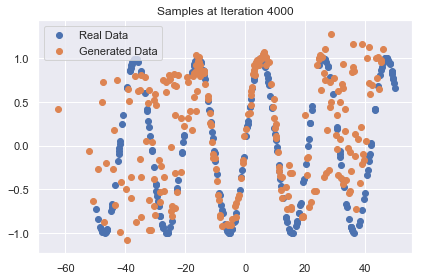

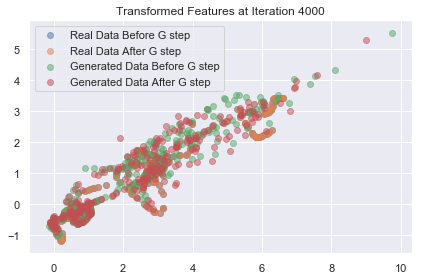

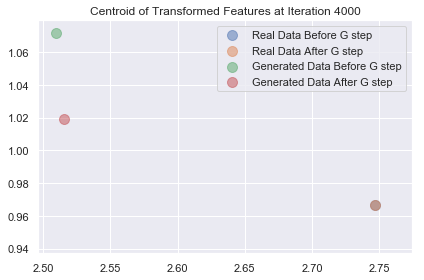

Iterations: 4001	 Discriminator loss: 1.2679	 Generator loss: 0.7820
Iterations: 4002	 Discriminator loss: 1.2935	 Generator loss: 0.7847
Iterations: 4003	 Discriminator loss: 1.3015	 Generator loss: 0.7396
Iterations: 4004	 Discriminator loss: 1.3135	 Generator loss: 0.7514
Iterations: 4005	 Discriminator loss: 1.2772	 Generator loss: 0.7067
Iterations: 4006	 Discriminator loss: 1.3004	 Generator loss: 0.7955
Iterations: 4007	 Discriminator loss: 1.2551	 Generator loss: 0.7891
Iterations: 4008	 Discriminator loss: 1.3004	 Generator loss: 0.7718
Iterations: 4009	 Discriminator loss: 1.3250	 Generator loss: 0.7916
Iterations: 4010	 Discriminator loss: 1.3427	 Generator loss: 0.7808
Iterations: 4011	 Discriminator loss: 1.3337	 Generator loss: 0.8196
Iterations: 4012	 Discriminator loss: 1.3074	 Generator loss: 0.7513
Iterations: 4013	 Discriminator loss: 1.3052	 Generator loss: 0.7835
Iterations: 4014	 Discriminator loss: 1.3531	 Generator loss: 0.7821
Iterations: 4015	 Discriminator lo

Iterations: 4128	 Discriminator loss: 1.2874	 Generator loss: 0.7750
Iterations: 4129	 Discriminator loss: 1.3022	 Generator loss: 0.7329
Iterations: 4130	 Discriminator loss: 1.3102	 Generator loss: 0.6827
Iterations: 4131	 Discriminator loss: 1.3219	 Generator loss: 0.7445
Iterations: 4132	 Discriminator loss: 1.3002	 Generator loss: 0.7176
Iterations: 4133	 Discriminator loss: 1.2782	 Generator loss: 0.7044
Iterations: 4134	 Discriminator loss: 1.3229	 Generator loss: 0.7251
Iterations: 4135	 Discriminator loss: 1.2940	 Generator loss: 0.7195
Iterations: 4136	 Discriminator loss: 1.3241	 Generator loss: 0.7322
Iterations: 4137	 Discriminator loss: 1.3182	 Generator loss: 0.6871
Iterations: 4138	 Discriminator loss: 1.3265	 Generator loss: 0.7374
Iterations: 4139	 Discriminator loss: 1.3081	 Generator loss: 0.7517
Iterations: 4140	 Discriminator loss: 1.2894	 Generator loss: 0.7204
Iterations: 4141	 Discriminator loss: 1.3074	 Generator loss: 0.7479
Iterations: 4142	 Discriminator lo

Iterations: 4248	 Discriminator loss: 1.2582	 Generator loss: 0.7518
Iterations: 4249	 Discriminator loss: 1.3420	 Generator loss: 0.7186
Iterations: 4250	 Discriminator loss: 1.3169	 Generator loss: 0.7652
Iterations: 4251	 Discriminator loss: 1.3355	 Generator loss: 0.7615
Iterations: 4252	 Discriminator loss: 1.3408	 Generator loss: 0.7158
Iterations: 4253	 Discriminator loss: 1.3215	 Generator loss: 0.7395
Iterations: 4254	 Discriminator loss: 1.2836	 Generator loss: 0.7454
Iterations: 4255	 Discriminator loss: 1.2989	 Generator loss: 0.7680
Iterations: 4256	 Discriminator loss: 1.3102	 Generator loss: 0.7294
Iterations: 4257	 Discriminator loss: 1.3143	 Generator loss: 0.7300
Iterations: 4258	 Discriminator loss: 1.2950	 Generator loss: 0.7487
Iterations: 4259	 Discriminator loss: 1.3022	 Generator loss: 0.7473
Iterations: 4260	 Discriminator loss: 1.3160	 Generator loss: 0.7556
Iterations: 4261	 Discriminator loss: 1.2856	 Generator loss: 0.7984
Iterations: 4262	 Discriminator lo

Iterations: 4375	 Discriminator loss: 1.3169	 Generator loss: 0.7803
Iterations: 4376	 Discriminator loss: 1.3067	 Generator loss: 0.7716
Iterations: 4377	 Discriminator loss: 1.3128	 Generator loss: 0.8102
Iterations: 4378	 Discriminator loss: 1.3187	 Generator loss: 0.8331
Iterations: 4379	 Discriminator loss: 1.3081	 Generator loss: 0.7677
Iterations: 4380	 Discriminator loss: 1.3229	 Generator loss: 0.7704
Iterations: 4381	 Discriminator loss: 1.3175	 Generator loss: 0.7922
Iterations: 4382	 Discriminator loss: 1.3051	 Generator loss: 0.7781
Iterations: 4383	 Discriminator loss: 1.3253	 Generator loss: 0.7647
Iterations: 4384	 Discriminator loss: 1.3219	 Generator loss: 0.7989
Iterations: 4385	 Discriminator loss: 1.3011	 Generator loss: 0.7950
Iterations: 4386	 Discriminator loss: 1.3046	 Generator loss: 0.7422
Iterations: 4387	 Discriminator loss: 1.2766	 Generator loss: 0.7542
Iterations: 4388	 Discriminator loss: 1.3172	 Generator loss: 0.7939
Iterations: 4389	 Discriminator lo

Iterations: 4494	 Discriminator loss: 1.2998	 Generator loss: 0.7511
Iterations: 4495	 Discriminator loss: 1.2861	 Generator loss: 0.7521
Iterations: 4496	 Discriminator loss: 1.2920	 Generator loss: 0.7903
Iterations: 4497	 Discriminator loss: 1.2875	 Generator loss: 0.8103
Iterations: 4498	 Discriminator loss: 1.3298	 Generator loss: 0.7343
Iterations: 4499	 Discriminator loss: 1.3296	 Generator loss: 0.7722
Iterations: 4500	 Discriminator loss: 1.2969	 Generator loss: 0.7499
Iterations: 4501	 Discriminator loss: 1.3044	 Generator loss: 0.7255
Iterations: 4502	 Discriminator loss: 1.2962	 Generator loss: 0.7480
Iterations: 4503	 Discriminator loss: 1.2524	 Generator loss: 0.7119
Iterations: 4504	 Discriminator loss: 1.3033	 Generator loss: 0.7646
Iterations: 4505	 Discriminator loss: 1.3294	 Generator loss: 0.8149
Iterations: 4506	 Discriminator loss: 1.2878	 Generator loss: 0.7172
Iterations: 4507	 Discriminator loss: 1.3235	 Generator loss: 0.7619
Iterations: 4508	 Discriminator lo

Iterations: 4620	 Discriminator loss: 1.2531	 Generator loss: 0.7900
Iterations: 4621	 Discriminator loss: 1.2921	 Generator loss: 0.7527
Iterations: 4622	 Discriminator loss: 1.2739	 Generator loss: 0.7867
Iterations: 4623	 Discriminator loss: 1.2862	 Generator loss: 0.7342
Iterations: 4624	 Discriminator loss: 1.3608	 Generator loss: 0.7523
Iterations: 4625	 Discriminator loss: 1.2709	 Generator loss: 0.7578
Iterations: 4626	 Discriminator loss: 1.3183	 Generator loss: 0.7885
Iterations: 4627	 Discriminator loss: 1.2789	 Generator loss: 0.7622
Iterations: 4628	 Discriminator loss: 1.2858	 Generator loss: 0.7654
Iterations: 4629	 Discriminator loss: 1.3196	 Generator loss: 0.7777
Iterations: 4630	 Discriminator loss: 1.2728	 Generator loss: 0.7955
Iterations: 4631	 Discriminator loss: 1.2873	 Generator loss: 0.7283
Iterations: 4632	 Discriminator loss: 1.3650	 Generator loss: 0.7723
Iterations: 4633	 Discriminator loss: 1.3385	 Generator loss: 0.7242
Iterations: 4634	 Discriminator lo

Iterations: 4738	 Discriminator loss: 1.3172	 Generator loss: 0.7729
Iterations: 4739	 Discriminator loss: 1.2989	 Generator loss: 0.7340
Iterations: 4740	 Discriminator loss: 1.3264	 Generator loss: 0.8151
Iterations: 4741	 Discriminator loss: 1.2878	 Generator loss: 0.7777
Iterations: 4742	 Discriminator loss: 1.2781	 Generator loss: 0.8359
Iterations: 4743	 Discriminator loss: 1.3002	 Generator loss: 0.7137
Iterations: 4744	 Discriminator loss: 1.3435	 Generator loss: 0.7363
Iterations: 4745	 Discriminator loss: 1.3180	 Generator loss: 0.7589
Iterations: 4746	 Discriminator loss: 1.3338	 Generator loss: 0.7232
Iterations: 4747	 Discriminator loss: 1.3083	 Generator loss: 0.7663
Iterations: 4748	 Discriminator loss: 1.3169	 Generator loss: 0.7631
Iterations: 4749	 Discriminator loss: 1.2799	 Generator loss: 0.7880
Iterations: 4750	 Discriminator loss: 1.2425	 Generator loss: 0.6927
Iterations: 4751	 Discriminator loss: 1.2920	 Generator loss: 0.7873
Iterations: 4752	 Discriminator lo

Iterations: 4864	 Discriminator loss: 1.3145	 Generator loss: 0.7789
Iterations: 4865	 Discriminator loss: 1.2965	 Generator loss: 0.7878
Iterations: 4866	 Discriminator loss: 1.2802	 Generator loss: 0.7380
Iterations: 4867	 Discriminator loss: 1.3579	 Generator loss: 0.7292
Iterations: 4868	 Discriminator loss: 1.3353	 Generator loss: 0.7536
Iterations: 4869	 Discriminator loss: 1.2811	 Generator loss: 0.7758
Iterations: 4870	 Discriminator loss: 1.3075	 Generator loss: 0.7116
Iterations: 4871	 Discriminator loss: 1.3173	 Generator loss: 0.8420
Iterations: 4872	 Discriminator loss: 1.2750	 Generator loss: 0.7224
Iterations: 4873	 Discriminator loss: 1.3031	 Generator loss: 0.7316
Iterations: 4874	 Discriminator loss: 1.2480	 Generator loss: 0.7510
Iterations: 4875	 Discriminator loss: 1.3228	 Generator loss: 0.7496
Iterations: 4876	 Discriminator loss: 1.2951	 Generator loss: 0.7523
Iterations: 4877	 Discriminator loss: 1.2850	 Generator loss: 0.7873
Iterations: 4878	 Discriminator lo

Iterations: 4992	 Discriminator loss: 1.3177	 Generator loss: 0.7392
Iterations: 4993	 Discriminator loss: 1.3175	 Generator loss: 0.7176
Iterations: 4994	 Discriminator loss: 1.2993	 Generator loss: 0.7576
Iterations: 4995	 Discriminator loss: 1.2722	 Generator loss: 0.7081
Iterations: 4996	 Discriminator loss: 1.3098	 Generator loss: 0.7446
Iterations: 4997	 Discriminator loss: 1.2507	 Generator loss: 0.7971
Iterations: 4998	 Discriminator loss: 1.2311	 Generator loss: 0.7368
Iterations: 4999	 Discriminator loss: 1.3155	 Generator loss: 0.7052
Iterations: 5000	 Discriminator loss: 1.2729	 Generator loss: 0.7491


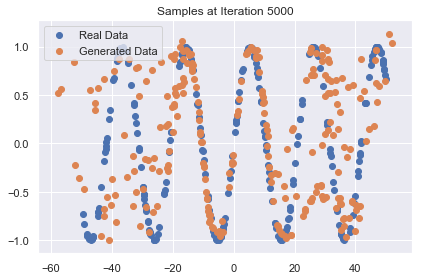

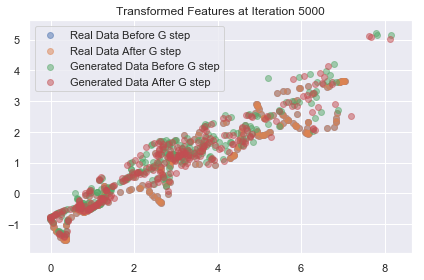

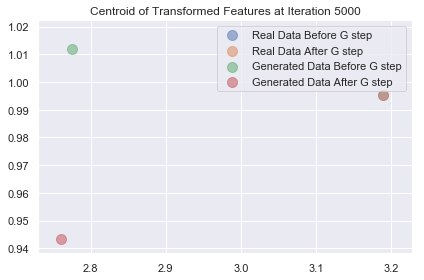

Iterations: 5001	 Discriminator loss: 1.3048	 Generator loss: 0.7783
Iterations: 5002	 Discriminator loss: 1.2846	 Generator loss: 0.6873
Iterations: 5003	 Discriminator loss: 1.2865	 Generator loss: 0.7637
Iterations: 5004	 Discriminator loss: 1.3605	 Generator loss: 0.7700
Iterations: 5005	 Discriminator loss: 1.3079	 Generator loss: 0.7719
Iterations: 5006	 Discriminator loss: 1.2884	 Generator loss: 0.7550
Iterations: 5007	 Discriminator loss: 1.1947	 Generator loss: 0.7332
Iterations: 5008	 Discriminator loss: 1.2888	 Generator loss: 0.7723
Iterations: 5009	 Discriminator loss: 1.3252	 Generator loss: 0.7363
Iterations: 5010	 Discriminator loss: 1.3048	 Generator loss: 0.7719
Iterations: 5011	 Discriminator loss: 1.2921	 Generator loss: 0.7329
Iterations: 5012	 Discriminator loss: 1.3091	 Generator loss: 0.7215
Iterations: 5013	 Discriminator loss: 1.3107	 Generator loss: 0.7662
Iterations: 5014	 Discriminator loss: 1.3158	 Generator loss: 0.7632
Iterations: 5015	 Discriminator lo

Iterations: 5120	 Discriminator loss: 1.2840	 Generator loss: 0.7614
Iterations: 5121	 Discriminator loss: 1.2764	 Generator loss: 0.7920
Iterations: 5122	 Discriminator loss: 1.2605	 Generator loss: 0.7624
Iterations: 5123	 Discriminator loss: 1.3070	 Generator loss: 0.7563
Iterations: 5124	 Discriminator loss: 1.3028	 Generator loss: 0.7638
Iterations: 5125	 Discriminator loss: 1.2808	 Generator loss: 0.7851
Iterations: 5126	 Discriminator loss: 1.3595	 Generator loss: 0.7689
Iterations: 5127	 Discriminator loss: 1.2711	 Generator loss: 0.7474
Iterations: 5128	 Discriminator loss: 1.2602	 Generator loss: 0.7564
Iterations: 5129	 Discriminator loss: 1.3515	 Generator loss: 0.7052
Iterations: 5130	 Discriminator loss: 1.3011	 Generator loss: 0.7807
Iterations: 5131	 Discriminator loss: 1.2602	 Generator loss: 0.7558
Iterations: 5132	 Discriminator loss: 1.2328	 Generator loss: 0.7293
Iterations: 5133	 Discriminator loss: 1.3249	 Generator loss: 0.7470
Iterations: 5134	 Discriminator lo

Iterations: 5246	 Discriminator loss: 1.2408	 Generator loss: 0.8724
Iterations: 5247	 Discriminator loss: 1.2863	 Generator loss: 0.8370
Iterations: 5248	 Discriminator loss: 1.3021	 Generator loss: 0.7487
Iterations: 5249	 Discriminator loss: 1.3202	 Generator loss: 0.8252
Iterations: 5250	 Discriminator loss: 1.2405	 Generator loss: 0.8550
Iterations: 5251	 Discriminator loss: 1.3039	 Generator loss: 0.8478
Iterations: 5252	 Discriminator loss: 1.2948	 Generator loss: 0.8021
Iterations: 5253	 Discriminator loss: 1.3212	 Generator loss: 0.8214
Iterations: 5254	 Discriminator loss: 1.3062	 Generator loss: 0.8292
Iterations: 5255	 Discriminator loss: 1.2925	 Generator loss: 0.8315
Iterations: 5256	 Discriminator loss: 1.2467	 Generator loss: 0.8190
Iterations: 5257	 Discriminator loss: 1.3144	 Generator loss: 0.8573
Iterations: 5258	 Discriminator loss: 1.2291	 Generator loss: 0.9045
Iterations: 5259	 Discriminator loss: 1.2786	 Generator loss: 0.8658
Iterations: 5260	 Discriminator lo

Iterations: 5374	 Discriminator loss: 1.2759	 Generator loss: 0.7682
Iterations: 5375	 Discriminator loss: 1.3256	 Generator loss: 0.7743
Iterations: 5376	 Discriminator loss: 1.3021	 Generator loss: 0.7160
Iterations: 5377	 Discriminator loss: 1.2947	 Generator loss: 0.7779
Iterations: 5378	 Discriminator loss: 1.2890	 Generator loss: 0.7276
Iterations: 5379	 Discriminator loss: 1.3301	 Generator loss: 0.7816
Iterations: 5380	 Discriminator loss: 1.2632	 Generator loss: 0.7731
Iterations: 5381	 Discriminator loss: 1.2275	 Generator loss: 0.7722
Iterations: 5382	 Discriminator loss: 1.3538	 Generator loss: 0.8329
Iterations: 5383	 Discriminator loss: 1.2513	 Generator loss: 0.8196
Iterations: 5384	 Discriminator loss: 1.2780	 Generator loss: 0.7042
Iterations: 5385	 Discriminator loss: 1.2603	 Generator loss: 0.7978
Iterations: 5386	 Discriminator loss: 1.2651	 Generator loss: 0.8666
Iterations: 5387	 Discriminator loss: 1.2686	 Generator loss: 0.8248
Iterations: 5388	 Discriminator lo

Iterations: 5492	 Discriminator loss: 1.2603	 Generator loss: 0.7794
Iterations: 5493	 Discriminator loss: 1.3079	 Generator loss: 0.8557
Iterations: 5494	 Discriminator loss: 1.2768	 Generator loss: 0.7502
Iterations: 5495	 Discriminator loss: 1.3096	 Generator loss: 0.8246
Iterations: 5496	 Discriminator loss: 1.2926	 Generator loss: 0.8032
Iterations: 5497	 Discriminator loss: 1.2802	 Generator loss: 0.7676
Iterations: 5498	 Discriminator loss: 1.2263	 Generator loss: 0.8061
Iterations: 5499	 Discriminator loss: 1.3220	 Generator loss: 0.7837
Iterations: 5500	 Discriminator loss: 1.2081	 Generator loss: 0.7514
Iterations: 5501	 Discriminator loss: 1.2431	 Generator loss: 0.8228
Iterations: 5502	 Discriminator loss: 1.2713	 Generator loss: 0.8165
Iterations: 5503	 Discriminator loss: 1.2436	 Generator loss: 0.7207
Iterations: 5504	 Discriminator loss: 1.2809	 Generator loss: 0.8079
Iterations: 5505	 Discriminator loss: 1.2257	 Generator loss: 0.7165
Iterations: 5506	 Discriminator lo

Iterations: 5611	 Discriminator loss: 1.2545	 Generator loss: 0.8324
Iterations: 5612	 Discriminator loss: 1.2453	 Generator loss: 0.7415
Iterations: 5613	 Discriminator loss: 1.2458	 Generator loss: 0.8381
Iterations: 5614	 Discriminator loss: 1.2826	 Generator loss: 0.7998
Iterations: 5615	 Discriminator loss: 1.2579	 Generator loss: 0.7723
Iterations: 5616	 Discriminator loss: 1.2717	 Generator loss: 0.7805
Iterations: 5617	 Discriminator loss: 1.2403	 Generator loss: 0.7959
Iterations: 5618	 Discriminator loss: 1.3175	 Generator loss: 0.8426
Iterations: 5619	 Discriminator loss: 1.2682	 Generator loss: 0.8257
Iterations: 5620	 Discriminator loss: 1.2364	 Generator loss: 0.8134
Iterations: 5621	 Discriminator loss: 1.1899	 Generator loss: 0.7941
Iterations: 5622	 Discriminator loss: 1.2821	 Generator loss: 0.7677
Iterations: 5623	 Discriminator loss: 1.2449	 Generator loss: 0.8115
Iterations: 5624	 Discriminator loss: 1.2751	 Generator loss: 0.7658
Iterations: 5625	 Discriminator lo

Iterations: 5729	 Discriminator loss: 1.2303	 Generator loss: 0.8340
Iterations: 5730	 Discriminator loss: 1.2705	 Generator loss: 0.7645
Iterations: 5731	 Discriminator loss: 1.2715	 Generator loss: 0.8021
Iterations: 5732	 Discriminator loss: 1.2183	 Generator loss: 0.7669
Iterations: 5733	 Discriminator loss: 1.3085	 Generator loss: 0.7944
Iterations: 5734	 Discriminator loss: 1.2892	 Generator loss: 0.8488
Iterations: 5735	 Discriminator loss: 1.3353	 Generator loss: 0.7998
Iterations: 5736	 Discriminator loss: 1.2778	 Generator loss: 0.8562
Iterations: 5737	 Discriminator loss: 1.2753	 Generator loss: 0.7749
Iterations: 5738	 Discriminator loss: 1.2614	 Generator loss: 0.7763
Iterations: 5739	 Discriminator loss: 1.2542	 Generator loss: 0.8330
Iterations: 5740	 Discriminator loss: 1.1924	 Generator loss: 0.7621
Iterations: 5741	 Discriminator loss: 1.2782	 Generator loss: 0.7992
Iterations: 5742	 Discriminator loss: 1.2230	 Generator loss: 0.8213
Iterations: 5743	 Discriminator lo

Iterations: 5856	 Discriminator loss: 1.2721	 Generator loss: 0.7970
Iterations: 5857	 Discriminator loss: 1.2885	 Generator loss: 0.8263
Iterations: 5858	 Discriminator loss: 1.3087	 Generator loss: 0.8063
Iterations: 5859	 Discriminator loss: 1.2775	 Generator loss: 0.8769
Iterations: 5860	 Discriminator loss: 1.2469	 Generator loss: 0.7911
Iterations: 5861	 Discriminator loss: 1.2769	 Generator loss: 0.8224
Iterations: 5862	 Discriminator loss: 1.3113	 Generator loss: 0.8338
Iterations: 5863	 Discriminator loss: 1.2870	 Generator loss: 0.7838
Iterations: 5864	 Discriminator loss: 1.2688	 Generator loss: 0.7817
Iterations: 5865	 Discriminator loss: 1.2343	 Generator loss: 0.7416
Iterations: 5866	 Discriminator loss: 1.2636	 Generator loss: 0.8155
Iterations: 5867	 Discriminator loss: 1.2964	 Generator loss: 0.7988
Iterations: 5868	 Discriminator loss: 1.2682	 Generator loss: 0.7873
Iterations: 5869	 Discriminator loss: 1.2304	 Generator loss: 0.7543
Iterations: 5870	 Discriminator lo

Iterations: 5981	 Discriminator loss: 1.3166	 Generator loss: 0.8180
Iterations: 5982	 Discriminator loss: 1.3087	 Generator loss: 0.7669
Iterations: 5983	 Discriminator loss: 1.2994	 Generator loss: 0.7671
Iterations: 5984	 Discriminator loss: 1.2664	 Generator loss: 0.8582
Iterations: 5985	 Discriminator loss: 1.2641	 Generator loss: 0.7886
Iterations: 5986	 Discriminator loss: 1.2821	 Generator loss: 0.7447
Iterations: 5987	 Discriminator loss: 1.2848	 Generator loss: 0.7941
Iterations: 5988	 Discriminator loss: 1.3050	 Generator loss: 0.7399
Iterations: 5989	 Discriminator loss: 1.2336	 Generator loss: 0.7654
Iterations: 5990	 Discriminator loss: 1.3024	 Generator loss: 0.7609
Iterations: 5991	 Discriminator loss: 1.2414	 Generator loss: 0.7653
Iterations: 5992	 Discriminator loss: 1.2936	 Generator loss: 0.7996
Iterations: 5993	 Discriminator loss: 1.3057	 Generator loss: 0.8211
Iterations: 5994	 Discriminator loss: 1.2817	 Generator loss: 0.8220
Iterations: 5995	 Discriminator lo

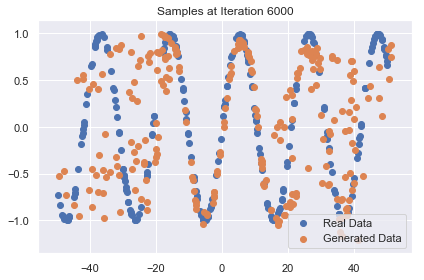

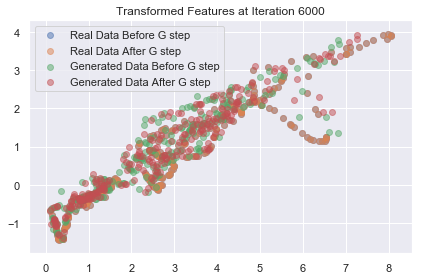

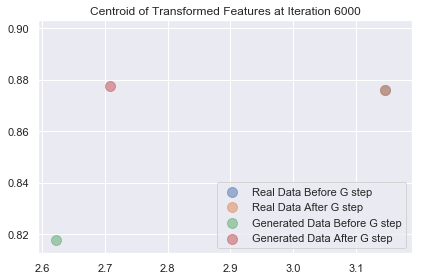

Iterations: 6001	 Discriminator loss: 1.2683	 Generator loss: 0.7738
Iterations: 6002	 Discriminator loss: 1.2595	 Generator loss: 0.8015
Iterations: 6003	 Discriminator loss: 1.2863	 Generator loss: 0.8139
Iterations: 6004	 Discriminator loss: 1.2823	 Generator loss: 0.7837
Iterations: 6005	 Discriminator loss: 1.2728	 Generator loss: 0.7784
Iterations: 6006	 Discriminator loss: 1.2846	 Generator loss: 0.7501
Iterations: 6007	 Discriminator loss: 1.2699	 Generator loss: 0.7944
Iterations: 6008	 Discriminator loss: 1.2909	 Generator loss: 0.7736
Iterations: 6009	 Discriminator loss: 1.2851	 Generator loss: 0.7733
Iterations: 6010	 Discriminator loss: 1.2817	 Generator loss: 0.7795
Iterations: 6011	 Discriminator loss: 1.2434	 Generator loss: 0.7778
Iterations: 6012	 Discriminator loss: 1.2151	 Generator loss: 0.8233
Iterations: 6013	 Discriminator loss: 1.2954	 Generator loss: 0.7183
Iterations: 6014	 Discriminator loss: 1.2800	 Generator loss: 0.8310
Iterations: 6015	 Discriminator lo

Iterations: 6122	 Discriminator loss: 1.2390	 Generator loss: 0.7580
Iterations: 6123	 Discriminator loss: 1.3110	 Generator loss: 0.8036
Iterations: 6124	 Discriminator loss: 1.3181	 Generator loss: 0.7720
Iterations: 6125	 Discriminator loss: 1.2883	 Generator loss: 0.7999
Iterations: 6126	 Discriminator loss: 1.2931	 Generator loss: 0.7767
Iterations: 6127	 Discriminator loss: 1.3087	 Generator loss: 0.8179
Iterations: 6128	 Discriminator loss: 1.2428	 Generator loss: 0.7422
Iterations: 6129	 Discriminator loss: 1.2777	 Generator loss: 0.8199
Iterations: 6130	 Discriminator loss: 1.2490	 Generator loss: 0.7717
Iterations: 6131	 Discriminator loss: 1.2824	 Generator loss: 0.7461
Iterations: 6132	 Discriminator loss: 1.2787	 Generator loss: 0.8366
Iterations: 6133	 Discriminator loss: 1.2850	 Generator loss: 0.7427
Iterations: 6134	 Discriminator loss: 1.2716	 Generator loss: 0.8443
Iterations: 6135	 Discriminator loss: 1.2803	 Generator loss: 0.7348
Iterations: 6136	 Discriminator lo

Iterations: 6249	 Discriminator loss: 1.2836	 Generator loss: 0.9315
Iterations: 6250	 Discriminator loss: 1.3051	 Generator loss: 0.8051
Iterations: 6251	 Discriminator loss: 1.3118	 Generator loss: 0.7962
Iterations: 6252	 Discriminator loss: 1.2833	 Generator loss: 0.8773
Iterations: 6253	 Discriminator loss: 1.2599	 Generator loss: 0.7922
Iterations: 6254	 Discriminator loss: 1.2565	 Generator loss: 0.8064
Iterations: 6255	 Discriminator loss: 1.2801	 Generator loss: 0.7811
Iterations: 6256	 Discriminator loss: 1.2715	 Generator loss: 0.7929
Iterations: 6257	 Discriminator loss: 1.3027	 Generator loss: 0.8540
Iterations: 6258	 Discriminator loss: 1.3027	 Generator loss: 0.8190
Iterations: 6259	 Discriminator loss: 1.3058	 Generator loss: 0.7795
Iterations: 6260	 Discriminator loss: 1.2995	 Generator loss: 0.7716
Iterations: 6261	 Discriminator loss: 1.2573	 Generator loss: 0.8452
Iterations: 6262	 Discriminator loss: 1.2834	 Generator loss: 0.8032
Iterations: 6263	 Discriminator lo

Iterations: 6375	 Discriminator loss: 1.2699	 Generator loss: 0.8405
Iterations: 6376	 Discriminator loss: 1.2588	 Generator loss: 0.7683
Iterations: 6377	 Discriminator loss: 1.2684	 Generator loss: 0.8817
Iterations: 6378	 Discriminator loss: 1.2560	 Generator loss: 0.7198
Iterations: 6379	 Discriminator loss: 1.2377	 Generator loss: 0.7563
Iterations: 6380	 Discriminator loss: 1.2810	 Generator loss: 0.7963
Iterations: 6381	 Discriminator loss: 1.2415	 Generator loss: 0.7847
Iterations: 6382	 Discriminator loss: 1.3005	 Generator loss: 0.8751
Iterations: 6383	 Discriminator loss: 1.2503	 Generator loss: 0.7715
Iterations: 6384	 Discriminator loss: 1.2547	 Generator loss: 0.8260
Iterations: 6385	 Discriminator loss: 1.2994	 Generator loss: 0.8444
Iterations: 6386	 Discriminator loss: 1.2402	 Generator loss: 0.7756
Iterations: 6387	 Discriminator loss: 1.2054	 Generator loss: 0.7630
Iterations: 6388	 Discriminator loss: 1.2504	 Generator loss: 0.8068
Iterations: 6389	 Discriminator lo

Iterations: 6497	 Discriminator loss: 1.3442	 Generator loss: 0.7573
Iterations: 6498	 Discriminator loss: 1.3059	 Generator loss: 0.7969
Iterations: 6499	 Discriminator loss: 1.2421	 Generator loss: 0.7727
Iterations: 6500	 Discriminator loss: 1.2252	 Generator loss: 0.8213
Iterations: 6501	 Discriminator loss: 1.3226	 Generator loss: 0.7605
Iterations: 6502	 Discriminator loss: 1.3528	 Generator loss: 0.7428
Iterations: 6503	 Discriminator loss: 1.2712	 Generator loss: 0.7705
Iterations: 6504	 Discriminator loss: 1.2934	 Generator loss: 0.7528
Iterations: 6505	 Discriminator loss: 1.3244	 Generator loss: 0.8304
Iterations: 6506	 Discriminator loss: 1.2440	 Generator loss: 0.7275
Iterations: 6507	 Discriminator loss: 1.2984	 Generator loss: 0.8024
Iterations: 6508	 Discriminator loss: 1.2869	 Generator loss: 0.8172
Iterations: 6509	 Discriminator loss: 1.2395	 Generator loss: 0.7900
Iterations: 6510	 Discriminator loss: 1.3080	 Generator loss: 0.7768
Iterations: 6511	 Discriminator lo

Iterations: 6616	 Discriminator loss: 1.2364	 Generator loss: 0.8170
Iterations: 6617	 Discriminator loss: 1.3398	 Generator loss: 0.7932
Iterations: 6618	 Discriminator loss: 1.2308	 Generator loss: 0.8208
Iterations: 6619	 Discriminator loss: 1.2457	 Generator loss: 0.8571
Iterations: 6620	 Discriminator loss: 1.2597	 Generator loss: 0.7590
Iterations: 6621	 Discriminator loss: 1.3212	 Generator loss: 0.8136
Iterations: 6622	 Discriminator loss: 1.2988	 Generator loss: 0.7333
Iterations: 6623	 Discriminator loss: 1.3005	 Generator loss: 0.8046
Iterations: 6624	 Discriminator loss: 1.2554	 Generator loss: 0.8111
Iterations: 6625	 Discriminator loss: 1.2284	 Generator loss: 0.7855
Iterations: 6626	 Discriminator loss: 1.2828	 Generator loss: 0.7968
Iterations: 6627	 Discriminator loss: 1.2630	 Generator loss: 0.8331
Iterations: 6628	 Discriminator loss: 1.2854	 Generator loss: 0.8016
Iterations: 6629	 Discriminator loss: 1.2977	 Generator loss: 0.7257
Iterations: 6630	 Discriminator lo

Iterations: 6734	 Discriminator loss: 1.2831	 Generator loss: 0.8306
Iterations: 6735	 Discriminator loss: 1.3247	 Generator loss: 0.7442
Iterations: 6736	 Discriminator loss: 1.3185	 Generator loss: 0.8317
Iterations: 6737	 Discriminator loss: 1.2388	 Generator loss: 0.7528
Iterations: 6738	 Discriminator loss: 1.3316	 Generator loss: 0.7605
Iterations: 6739	 Discriminator loss: 1.2891	 Generator loss: 0.7528
Iterations: 6740	 Discriminator loss: 1.2540	 Generator loss: 0.7702
Iterations: 6741	 Discriminator loss: 1.3273	 Generator loss: 0.8327
Iterations: 6742	 Discriminator loss: 1.2430	 Generator loss: 0.7777
Iterations: 6743	 Discriminator loss: 1.3084	 Generator loss: 0.8510
Iterations: 6744	 Discriminator loss: 1.2737	 Generator loss: 0.7777
Iterations: 6745	 Discriminator loss: 1.3163	 Generator loss: 0.7281
Iterations: 6746	 Discriminator loss: 1.2617	 Generator loss: 0.8251
Iterations: 6747	 Discriminator loss: 1.2735	 Generator loss: 0.8099
Iterations: 6748	 Discriminator lo

Iterations: 6857	 Discriminator loss: 1.2188	 Generator loss: 0.7698
Iterations: 6858	 Discriminator loss: 1.2929	 Generator loss: 0.7779
Iterations: 6859	 Discriminator loss: 1.2007	 Generator loss: 0.7294
Iterations: 6860	 Discriminator loss: 1.2701	 Generator loss: 0.7863
Iterations: 6861	 Discriminator loss: 1.1975	 Generator loss: 0.8076
Iterations: 6862	 Discriminator loss: 1.2371	 Generator loss: 0.7943
Iterations: 6863	 Discriminator loss: 1.2748	 Generator loss: 0.7548
Iterations: 6864	 Discriminator loss: 1.2849	 Generator loss: 0.8017
Iterations: 6865	 Discriminator loss: 1.2451	 Generator loss: 0.7647
Iterations: 6866	 Discriminator loss: 1.2743	 Generator loss: 0.7994
Iterations: 6867	 Discriminator loss: 1.3098	 Generator loss: 0.7682
Iterations: 6868	 Discriminator loss: 1.3027	 Generator loss: 0.7149
Iterations: 6869	 Discriminator loss: 1.2611	 Generator loss: 0.8115
Iterations: 6870	 Discriminator loss: 1.2580	 Generator loss: 0.8446
Iterations: 6871	 Discriminator lo

Iterations: 6980	 Discriminator loss: 1.2057	 Generator loss: 0.7443
Iterations: 6981	 Discriminator loss: 1.2305	 Generator loss: 0.8171
Iterations: 6982	 Discriminator loss: 1.2809	 Generator loss: 0.8376
Iterations: 6983	 Discriminator loss: 1.2943	 Generator loss: 0.7339
Iterations: 6984	 Discriminator loss: 1.3166	 Generator loss: 0.7355
Iterations: 6985	 Discriminator loss: 1.2647	 Generator loss: 0.7802
Iterations: 6986	 Discriminator loss: 1.2643	 Generator loss: 0.8109
Iterations: 6987	 Discriminator loss: 1.2981	 Generator loss: 0.8350
Iterations: 6988	 Discriminator loss: 1.2759	 Generator loss: 0.7836
Iterations: 6989	 Discriminator loss: 1.2369	 Generator loss: 0.7797
Iterations: 6990	 Discriminator loss: 1.2655	 Generator loss: 0.7966
Iterations: 6991	 Discriminator loss: 1.3195	 Generator loss: 0.7596
Iterations: 6992	 Discriminator loss: 1.3038	 Generator loss: 0.7825
Iterations: 6993	 Discriminator loss: 1.2939	 Generator loss: 0.7813
Iterations: 6994	 Discriminator lo

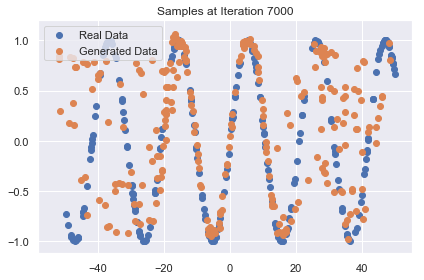

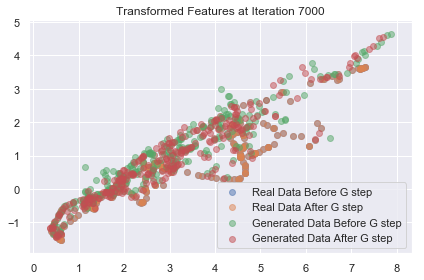

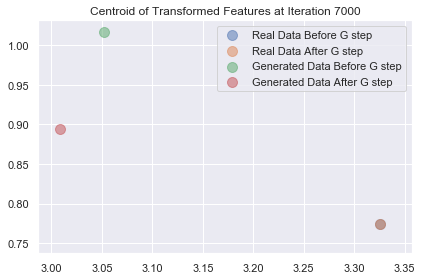

Iterations: 7001	 Discriminator loss: 1.3295	 Generator loss: 0.7763
Iterations: 7002	 Discriminator loss: 1.2826	 Generator loss: 0.8026
Iterations: 7003	 Discriminator loss: 1.2599	 Generator loss: 0.7543
Iterations: 7004	 Discriminator loss: 1.2720	 Generator loss: 0.7773
Iterations: 7005	 Discriminator loss: 1.2536	 Generator loss: 0.7659
Iterations: 7006	 Discriminator loss: 1.2987	 Generator loss: 0.8025
Iterations: 7007	 Discriminator loss: 1.2524	 Generator loss: 0.7934
Iterations: 7008	 Discriminator loss: 1.2485	 Generator loss: 0.8078
Iterations: 7009	 Discriminator loss: 1.2413	 Generator loss: 0.7820
Iterations: 7010	 Discriminator loss: 1.2536	 Generator loss: 0.7989
Iterations: 7011	 Discriminator loss: 1.2781	 Generator loss: 0.7796
Iterations: 7012	 Discriminator loss: 1.2277	 Generator loss: 0.8321
Iterations: 7013	 Discriminator loss: 1.2859	 Generator loss: 0.8164
Iterations: 7014	 Discriminator loss: 1.1830	 Generator loss: 0.7443
Iterations: 7015	 Discriminator lo

Iterations: 7121	 Discriminator loss: 1.2611	 Generator loss: 0.7967
Iterations: 7122	 Discriminator loss: 1.3017	 Generator loss: 0.7477
Iterations: 7123	 Discriminator loss: 1.2559	 Generator loss: 0.8172
Iterations: 7124	 Discriminator loss: 1.2408	 Generator loss: 0.7661
Iterations: 7125	 Discriminator loss: 1.2626	 Generator loss: 0.7751
Iterations: 7126	 Discriminator loss: 1.2926	 Generator loss: 0.7790
Iterations: 7127	 Discriminator loss: 1.3046	 Generator loss: 0.8401
Iterations: 7128	 Discriminator loss: 1.2490	 Generator loss: 0.8162
Iterations: 7129	 Discriminator loss: 1.3076	 Generator loss: 0.7506
Iterations: 7130	 Discriminator loss: 1.3003	 Generator loss: 0.7324
Iterations: 7131	 Discriminator loss: 1.2640	 Generator loss: 0.7681
Iterations: 7132	 Discriminator loss: 1.2971	 Generator loss: 0.7865
Iterations: 7133	 Discriminator loss: 1.2719	 Generator loss: 0.7904
Iterations: 7134	 Discriminator loss: 1.2963	 Generator loss: 0.8230
Iterations: 7135	 Discriminator lo

Iterations: 7242	 Discriminator loss: 1.1789	 Generator loss: 0.8607
Iterations: 7243	 Discriminator loss: 1.2480	 Generator loss: 0.8754
Iterations: 7244	 Discriminator loss: 1.2470	 Generator loss: 0.7886
Iterations: 7245	 Discriminator loss: 1.3307	 Generator loss: 0.8381
Iterations: 7246	 Discriminator loss: 1.2873	 Generator loss: 0.7672
Iterations: 7247	 Discriminator loss: 1.2340	 Generator loss: 0.8036
Iterations: 7248	 Discriminator loss: 1.2702	 Generator loss: 0.8419
Iterations: 7249	 Discriminator loss: 1.2546	 Generator loss: 0.7807
Iterations: 7250	 Discriminator loss: 1.2883	 Generator loss: 0.8070
Iterations: 7251	 Discriminator loss: 1.2243	 Generator loss: 0.7561
Iterations: 7252	 Discriminator loss: 1.2886	 Generator loss: 0.7518
Iterations: 7253	 Discriminator loss: 1.2520	 Generator loss: 0.7532
Iterations: 7254	 Discriminator loss: 1.2548	 Generator loss: 0.7593
Iterations: 7255	 Discriminator loss: 1.2451	 Generator loss: 0.8445
Iterations: 7256	 Discriminator lo

Iterations: 7369	 Discriminator loss: 1.2669	 Generator loss: 0.8821
Iterations: 7370	 Discriminator loss: 1.2973	 Generator loss: 0.8784
Iterations: 7371	 Discriminator loss: 1.2338	 Generator loss: 0.8611
Iterations: 7372	 Discriminator loss: 1.3094	 Generator loss: 0.7917
Iterations: 7373	 Discriminator loss: 1.2288	 Generator loss: 0.8414
Iterations: 7374	 Discriminator loss: 1.2811	 Generator loss: 0.8297
Iterations: 7375	 Discriminator loss: 1.3276	 Generator loss: 0.8768
Iterations: 7376	 Discriminator loss: 1.2252	 Generator loss: 0.7624
Iterations: 7377	 Discriminator loss: 1.2426	 Generator loss: 0.8549
Iterations: 7378	 Discriminator loss: 1.2159	 Generator loss: 0.8846
Iterations: 7379	 Discriminator loss: 1.2416	 Generator loss: 0.8897
Iterations: 7380	 Discriminator loss: 1.3177	 Generator loss: 0.8248
Iterations: 7381	 Discriminator loss: 1.2874	 Generator loss: 0.8591
Iterations: 7382	 Discriminator loss: 1.2391	 Generator loss: 0.8039
Iterations: 7383	 Discriminator lo

Iterations: 7496	 Discriminator loss: 1.2249	 Generator loss: 0.7952
Iterations: 7497	 Discriminator loss: 1.2174	 Generator loss: 0.8742
Iterations: 7498	 Discriminator loss: 1.2495	 Generator loss: 0.8954
Iterations: 7499	 Discriminator loss: 1.2516	 Generator loss: 0.8919
Iterations: 7500	 Discriminator loss: 1.2581	 Generator loss: 0.9109
Iterations: 7501	 Discriminator loss: 1.2255	 Generator loss: 0.7683
Iterations: 7502	 Discriminator loss: 1.2712	 Generator loss: 0.7419
Iterations: 7503	 Discriminator loss: 1.3010	 Generator loss: 0.7879
Iterations: 7504	 Discriminator loss: 1.2469	 Generator loss: 0.7831
Iterations: 7505	 Discriminator loss: 1.2083	 Generator loss: 0.9814
Iterations: 7506	 Discriminator loss: 1.2880	 Generator loss: 0.8346
Iterations: 7507	 Discriminator loss: 1.3221	 Generator loss: 0.8142
Iterations: 7508	 Discriminator loss: 1.2728	 Generator loss: 0.8177
Iterations: 7509	 Discriminator loss: 1.2654	 Generator loss: 0.8362
Iterations: 7510	 Discriminator lo

Iterations: 7614	 Discriminator loss: 1.2323	 Generator loss: 0.8834
Iterations: 7615	 Discriminator loss: 1.2495	 Generator loss: 0.7702
Iterations: 7616	 Discriminator loss: 1.2446	 Generator loss: 0.7823
Iterations: 7617	 Discriminator loss: 1.2085	 Generator loss: 0.8817
Iterations: 7618	 Discriminator loss: 1.2364	 Generator loss: 0.7305
Iterations: 7619	 Discriminator loss: 1.2766	 Generator loss: 0.7683
Iterations: 7620	 Discriminator loss: 1.2894	 Generator loss: 0.7930
Iterations: 7621	 Discriminator loss: 1.2391	 Generator loss: 0.8807
Iterations: 7622	 Discriminator loss: 1.2830	 Generator loss: 0.8922
Iterations: 7623	 Discriminator loss: 1.1971	 Generator loss: 0.6973
Iterations: 7624	 Discriminator loss: 1.2321	 Generator loss: 0.8186
Iterations: 7625	 Discriminator loss: 1.2705	 Generator loss: 0.8525
Iterations: 7626	 Discriminator loss: 1.2722	 Generator loss: 0.7975
Iterations: 7627	 Discriminator loss: 1.2540	 Generator loss: 0.9310
Iterations: 7628	 Discriminator lo

Iterations: 7732	 Discriminator loss: 1.2622	 Generator loss: 0.8294
Iterations: 7733	 Discriminator loss: 1.2543	 Generator loss: 0.8906
Iterations: 7734	 Discriminator loss: 1.2591	 Generator loss: 0.8177
Iterations: 7735	 Discriminator loss: 1.2138	 Generator loss: 0.7301
Iterations: 7736	 Discriminator loss: 1.2122	 Generator loss: 0.8623
Iterations: 7737	 Discriminator loss: 1.1163	 Generator loss: 0.6900
Iterations: 7738	 Discriminator loss: 1.1909	 Generator loss: 0.7435
Iterations: 7739	 Discriminator loss: 1.2452	 Generator loss: 0.8244
Iterations: 7740	 Discriminator loss: 1.2227	 Generator loss: 0.8130
Iterations: 7741	 Discriminator loss: 1.2503	 Generator loss: 0.8035
Iterations: 7742	 Discriminator loss: 1.2776	 Generator loss: 0.7945
Iterations: 7743	 Discriminator loss: 1.2064	 Generator loss: 0.9048
Iterations: 7744	 Discriminator loss: 1.2349	 Generator loss: 0.7846
Iterations: 7745	 Discriminator loss: 1.2568	 Generator loss: 0.7923
Iterations: 7746	 Discriminator lo

Iterations: 7859	 Discriminator loss: 1.2162	 Generator loss: 0.7432
Iterations: 7860	 Discriminator loss: 1.2425	 Generator loss: 0.8815
Iterations: 7861	 Discriminator loss: 1.2454	 Generator loss: 0.8316
Iterations: 7862	 Discriminator loss: 1.2461	 Generator loss: 0.8797
Iterations: 7863	 Discriminator loss: 1.2482	 Generator loss: 0.8941
Iterations: 7864	 Discriminator loss: 1.2394	 Generator loss: 0.9034
Iterations: 7865	 Discriminator loss: 1.2487	 Generator loss: 0.8671
Iterations: 7866	 Discriminator loss: 1.2595	 Generator loss: 0.8452
Iterations: 7867	 Discriminator loss: 1.2843	 Generator loss: 0.8907
Iterations: 7868	 Discriminator loss: 1.2418	 Generator loss: 0.8983
Iterations: 7869	 Discriminator loss: 1.2560	 Generator loss: 0.8416
Iterations: 7870	 Discriminator loss: 1.2134	 Generator loss: 0.7803
Iterations: 7871	 Discriminator loss: 1.2503	 Generator loss: 0.8582
Iterations: 7872	 Discriminator loss: 1.2465	 Generator loss: 0.8658
Iterations: 7873	 Discriminator lo

Iterations: 7988	 Discriminator loss: 1.2387	 Generator loss: 0.7829
Iterations: 7989	 Discriminator loss: 1.2844	 Generator loss: 0.8209
Iterations: 7990	 Discriminator loss: 1.0682	 Generator loss: 0.7085
Iterations: 7991	 Discriminator loss: 1.2615	 Generator loss: 0.8268
Iterations: 7992	 Discriminator loss: 1.3046	 Generator loss: 0.8038
Iterations: 7993	 Discriminator loss: 1.2333	 Generator loss: 0.7883
Iterations: 7994	 Discriminator loss: 1.2178	 Generator loss: 0.9095
Iterations: 7995	 Discriminator loss: 1.2775	 Generator loss: 0.7796
Iterations: 7996	 Discriminator loss: 1.2713	 Generator loss: 0.8339
Iterations: 7997	 Discriminator loss: 1.2484	 Generator loss: 0.9529
Iterations: 7998	 Discriminator loss: 1.2276	 Generator loss: 0.7956
Iterations: 7999	 Discriminator loss: 1.2421	 Generator loss: 0.8336
Iterations: 8000	 Discriminator loss: 1.2890	 Generator loss: 0.8033


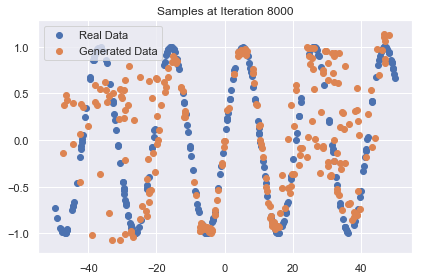

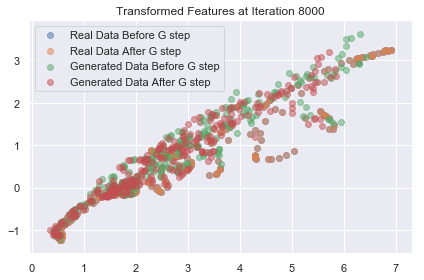

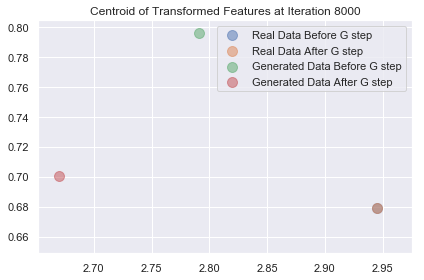

Iterations: 8001	 Discriminator loss: 1.3237	 Generator loss: 0.8348
Iterations: 8002	 Discriminator loss: 1.2552	 Generator loss: 0.8485
Iterations: 8003	 Discriminator loss: 1.2254	 Generator loss: 0.8639
Iterations: 8004	 Discriminator loss: 1.2358	 Generator loss: 0.7687
Iterations: 8005	 Discriminator loss: 1.2861	 Generator loss: 0.8324
Iterations: 8006	 Discriminator loss: 1.2173	 Generator loss: 0.7316
Iterations: 8007	 Discriminator loss: 1.2637	 Generator loss: 0.8650
Iterations: 8008	 Discriminator loss: 1.2616	 Generator loss: 0.8139
Iterations: 8009	 Discriminator loss: 1.2243	 Generator loss: 0.7840
Iterations: 8010	 Discriminator loss: 1.2932	 Generator loss: 0.8619
Iterations: 8011	 Discriminator loss: 1.2500	 Generator loss: 0.7601
Iterations: 8012	 Discriminator loss: 1.2736	 Generator loss: 0.9230
Iterations: 8013	 Discriminator loss: 1.1309	 Generator loss: 0.7164
Iterations: 8014	 Discriminator loss: 1.3158	 Generator loss: 0.9586
Iterations: 8015	 Discriminator lo

Iterations: 8126	 Discriminator loss: 1.2097	 Generator loss: 0.7891
Iterations: 8127	 Discriminator loss: 1.2006	 Generator loss: 0.7674
Iterations: 8128	 Discriminator loss: 1.2101	 Generator loss: 0.8482
Iterations: 8129	 Discriminator loss: 1.2766	 Generator loss: 0.7308
Iterations: 8130	 Discriminator loss: 1.2189	 Generator loss: 0.8285
Iterations: 8131	 Discriminator loss: 1.2738	 Generator loss: 0.7786
Iterations: 8132	 Discriminator loss: 1.2599	 Generator loss: 0.7899
Iterations: 8133	 Discriminator loss: 1.2592	 Generator loss: 0.7904
Iterations: 8134	 Discriminator loss: 1.2232	 Generator loss: 0.7926
Iterations: 8135	 Discriminator loss: 1.2052	 Generator loss: 0.8300
Iterations: 8136	 Discriminator loss: 1.2384	 Generator loss: 0.7948
Iterations: 8137	 Discriminator loss: 1.2409	 Generator loss: 0.9383
Iterations: 8138	 Discriminator loss: 1.1696	 Generator loss: 0.7728
Iterations: 8139	 Discriminator loss: 1.2613	 Generator loss: 0.8095
Iterations: 8140	 Discriminator lo

Iterations: 8252	 Discriminator loss: 1.2384	 Generator loss: 0.8170
Iterations: 8253	 Discriminator loss: 1.2333	 Generator loss: 0.8153
Iterations: 8254	 Discriminator loss: 1.2262	 Generator loss: 0.7977
Iterations: 8255	 Discriminator loss: 1.2429	 Generator loss: 0.8021
Iterations: 8256	 Discriminator loss: 1.2618	 Generator loss: 0.8507
Iterations: 8257	 Discriminator loss: 1.2092	 Generator loss: 0.8197
Iterations: 8258	 Discriminator loss: 1.2594	 Generator loss: 0.7596
Iterations: 8259	 Discriminator loss: 1.2466	 Generator loss: 0.8112
Iterations: 8260	 Discriminator loss: 1.2608	 Generator loss: 0.8330
Iterations: 8261	 Discriminator loss: 1.2422	 Generator loss: 0.7555
Iterations: 8262	 Discriminator loss: 1.2403	 Generator loss: 0.8109
Iterations: 8263	 Discriminator loss: 1.1993	 Generator loss: 0.8080
Iterations: 8264	 Discriminator loss: 1.2873	 Generator loss: 0.8303
Iterations: 8265	 Discriminator loss: 1.2116	 Generator loss: 0.8300
Iterations: 8266	 Discriminator lo

Iterations: 8380	 Discriminator loss: 1.2587	 Generator loss: 0.7886
Iterations: 8381	 Discriminator loss: 1.2758	 Generator loss: 0.7698
Iterations: 8382	 Discriminator loss: 1.2523	 Generator loss: 0.7938
Iterations: 8383	 Discriminator loss: 1.2318	 Generator loss: 0.8309
Iterations: 8384	 Discriminator loss: 1.2378	 Generator loss: 0.8403
Iterations: 8385	 Discriminator loss: 1.2703	 Generator loss: 0.7708
Iterations: 8386	 Discriminator loss: 1.2668	 Generator loss: 0.7937
Iterations: 8387	 Discriminator loss: 1.2537	 Generator loss: 0.7469
Iterations: 8388	 Discriminator loss: 1.2527	 Generator loss: 0.7972
Iterations: 8389	 Discriminator loss: 1.2454	 Generator loss: 0.8406
Iterations: 8390	 Discriminator loss: 1.2755	 Generator loss: 0.8449
Iterations: 8391	 Discriminator loss: 1.2501	 Generator loss: 0.7508
Iterations: 8392	 Discriminator loss: 1.2216	 Generator loss: 0.8199
Iterations: 8393	 Discriminator loss: 1.2524	 Generator loss: 0.7832
Iterations: 8394	 Discriminator lo

Iterations: 8508	 Discriminator loss: 1.2009	 Generator loss: 0.8960
Iterations: 8509	 Discriminator loss: 1.2192	 Generator loss: 0.8806
Iterations: 8510	 Discriminator loss: 1.3891	 Generator loss: 0.7923
Iterations: 8511	 Discriminator loss: 1.1920	 Generator loss: 0.9339
Iterations: 8512	 Discriminator loss: 1.2102	 Generator loss: 0.8889
Iterations: 8513	 Discriminator loss: 1.1885	 Generator loss: 0.8670
Iterations: 8514	 Discriminator loss: 1.2011	 Generator loss: 0.8101
Iterations: 8515	 Discriminator loss: 1.2114	 Generator loss: 0.8435
Iterations: 8516	 Discriminator loss: 1.2363	 Generator loss: 0.8997
Iterations: 8517	 Discriminator loss: 1.2399	 Generator loss: 0.8473
Iterations: 8518	 Discriminator loss: 1.2517	 Generator loss: 1.0250
Iterations: 8519	 Discriminator loss: 1.2448	 Generator loss: 0.8252
Iterations: 8520	 Discriminator loss: 1.2335	 Generator loss: 0.8669
Iterations: 8521	 Discriminator loss: 1.1821	 Generator loss: 0.7800
Iterations: 8522	 Discriminator lo

Iterations: 8631	 Discriminator loss: 1.2122	 Generator loss: 0.9469
Iterations: 8632	 Discriminator loss: 1.2123	 Generator loss: 1.1182
Iterations: 8633	 Discriminator loss: 1.1616	 Generator loss: 0.8521
Iterations: 8634	 Discriminator loss: 1.2827	 Generator loss: 0.9209
Iterations: 8635	 Discriminator loss: 1.2592	 Generator loss: 0.8676
Iterations: 8636	 Discriminator loss: 1.2187	 Generator loss: 0.9351
Iterations: 8637	 Discriminator loss: 1.1895	 Generator loss: 0.8107
Iterations: 8638	 Discriminator loss: 1.2674	 Generator loss: 0.8848
Iterations: 8639	 Discriminator loss: 1.2815	 Generator loss: 0.8620
Iterations: 8640	 Discriminator loss: 1.2044	 Generator loss: 0.8006
Iterations: 8641	 Discriminator loss: 1.2209	 Generator loss: 0.8793
Iterations: 8642	 Discriminator loss: 1.2044	 Generator loss: 0.8131
Iterations: 8643	 Discriminator loss: 1.2828	 Generator loss: 0.8957
Iterations: 8644	 Discriminator loss: 1.2170	 Generator loss: 0.9187
Iterations: 8645	 Discriminator lo

Iterations: 8757	 Discriminator loss: 1.2121	 Generator loss: 0.8358
Iterations: 8758	 Discriminator loss: 1.2398	 Generator loss: 0.7766
Iterations: 8759	 Discriminator loss: 1.2476	 Generator loss: 0.8120
Iterations: 8760	 Discriminator loss: 1.2469	 Generator loss: 1.0031
Iterations: 8761	 Discriminator loss: 1.1176	 Generator loss: 0.7701
Iterations: 8762	 Discriminator loss: 1.2610	 Generator loss: 0.8360
Iterations: 8763	 Discriminator loss: 1.2301	 Generator loss: 0.7635
Iterations: 8764	 Discriminator loss: 1.2616	 Generator loss: 0.7637
Iterations: 8765	 Discriminator loss: 1.1951	 Generator loss: 0.8819
Iterations: 8766	 Discriminator loss: 1.2473	 Generator loss: 0.8138
Iterations: 8767	 Discriminator loss: 1.3138	 Generator loss: 0.7737
Iterations: 8768	 Discriminator loss: 1.2089	 Generator loss: 0.7927
Iterations: 8769	 Discriminator loss: 1.2577	 Generator loss: 0.7904
Iterations: 8770	 Discriminator loss: 1.2400	 Generator loss: 0.8344
Iterations: 8771	 Discriminator lo

Iterations: 8882	 Discriminator loss: 1.1628	 Generator loss: 0.7983
Iterations: 8883	 Discriminator loss: 1.2121	 Generator loss: 0.8716
Iterations: 8884	 Discriminator loss: 1.2471	 Generator loss: 0.9400
Iterations: 8885	 Discriminator loss: 1.1978	 Generator loss: 0.8245
Iterations: 8886	 Discriminator loss: 1.1352	 Generator loss: 0.7601
Iterations: 8887	 Discriminator loss: 1.2815	 Generator loss: 0.7626
Iterations: 8888	 Discriminator loss: 1.1888	 Generator loss: 1.0238
Iterations: 8889	 Discriminator loss: 1.2181	 Generator loss: 0.7895
Iterations: 8890	 Discriminator loss: 1.2132	 Generator loss: 0.8498
Iterations: 8891	 Discriminator loss: 1.2400	 Generator loss: 0.8288
Iterations: 8892	 Discriminator loss: 1.2700	 Generator loss: 0.8343
Iterations: 8893	 Discriminator loss: 1.1104	 Generator loss: 0.7562
Iterations: 8894	 Discriminator loss: 1.1904	 Generator loss: 0.7724
Iterations: 8895	 Discriminator loss: 1.2477	 Generator loss: 0.9556
Iterations: 8896	 Discriminator lo

Iterations: 9000	 Discriminator loss: 1.2919	 Generator loss: 0.8352


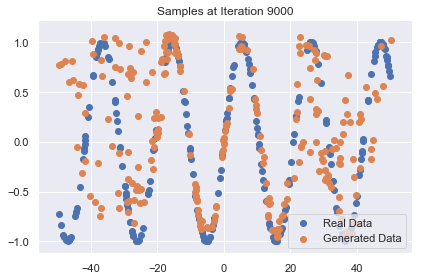

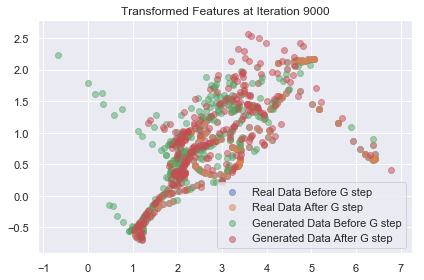

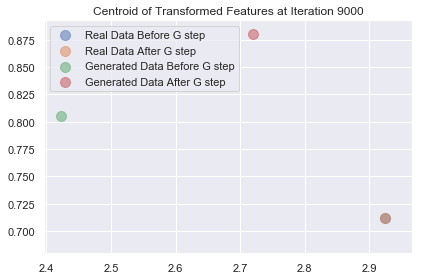

Iterations: 9001	 Discriminator loss: 1.2342	 Generator loss: 0.8232
Iterations: 9002	 Discriminator loss: 1.2407	 Generator loss: 0.7788
Iterations: 9003	 Discriminator loss: 1.2237	 Generator loss: 0.8062
Iterations: 9004	 Discriminator loss: 1.1712	 Generator loss: 0.7714
Iterations: 9005	 Discriminator loss: 1.2380	 Generator loss: 0.8465
Iterations: 9006	 Discriminator loss: 1.2460	 Generator loss: 0.7776
Iterations: 9007	 Discriminator loss: 1.2494	 Generator loss: 0.7432
Iterations: 9008	 Discriminator loss: 1.1909	 Generator loss: 0.8253
Iterations: 9009	 Discriminator loss: 1.2332	 Generator loss: 0.8054
Iterations: 9010	 Discriminator loss: 1.1594	 Generator loss: 0.8878
Iterations: 9011	 Discriminator loss: 1.2107	 Generator loss: 0.8901
Iterations: 9012	 Discriminator loss: 1.1918	 Generator loss: 0.8024
Iterations: 9013	 Discriminator loss: 1.2117	 Generator loss: 0.8035
Iterations: 9014	 Discriminator loss: 1.1544	 Generator loss: 0.6837
Iterations: 9015	 Discriminator lo

Iterations: 9122	 Discriminator loss: 1.2157	 Generator loss: 0.8277
Iterations: 9123	 Discriminator loss: 1.2523	 Generator loss: 0.8371
Iterations: 9124	 Discriminator loss: 1.2069	 Generator loss: 0.8042
Iterations: 9125	 Discriminator loss: 1.2414	 Generator loss: 0.8216
Iterations: 9126	 Discriminator loss: 1.2320	 Generator loss: 0.8333
Iterations: 9127	 Discriminator loss: 1.1864	 Generator loss: 0.8053
Iterations: 9128	 Discriminator loss: 1.1923	 Generator loss: 0.8157
Iterations: 9129	 Discriminator loss: 1.1982	 Generator loss: 0.8492
Iterations: 9130	 Discriminator loss: 1.2658	 Generator loss: 0.7935
Iterations: 9131	 Discriminator loss: 1.1539	 Generator loss: 0.9211
Iterations: 9132	 Discriminator loss: 1.2607	 Generator loss: 0.9111
Iterations: 9133	 Discriminator loss: 1.2319	 Generator loss: 0.8682
Iterations: 9134	 Discriminator loss: 1.2594	 Generator loss: 0.7768
Iterations: 9135	 Discriminator loss: 1.2153	 Generator loss: 0.8708
Iterations: 9136	 Discriminator lo

Iterations: 9246	 Discriminator loss: 1.1627	 Generator loss: 0.8068
Iterations: 9247	 Discriminator loss: 1.2324	 Generator loss: 0.8377
Iterations: 9248	 Discriminator loss: 1.2152	 Generator loss: 0.8849
Iterations: 9249	 Discriminator loss: 1.1822	 Generator loss: 0.7701
Iterations: 9250	 Discriminator loss: 1.2388	 Generator loss: 0.8503
Iterations: 9251	 Discriminator loss: 1.2831	 Generator loss: 0.8083
Iterations: 9252	 Discriminator loss: 1.2268	 Generator loss: 0.8443
Iterations: 9253	 Discriminator loss: 1.1633	 Generator loss: 0.7996
Iterations: 9254	 Discriminator loss: 1.1937	 Generator loss: 0.8234
Iterations: 9255	 Discriminator loss: 1.2228	 Generator loss: 0.8263
Iterations: 9256	 Discriminator loss: 1.2481	 Generator loss: 0.7862
Iterations: 9257	 Discriminator loss: 1.1640	 Generator loss: 0.7580
Iterations: 9258	 Discriminator loss: 1.2271	 Generator loss: 0.7959
Iterations: 9259	 Discriminator loss: 1.2004	 Generator loss: 1.0062
Iterations: 9260	 Discriminator lo

Iterations: 9372	 Discriminator loss: 1.1894	 Generator loss: 0.8516
Iterations: 9373	 Discriminator loss: 1.2054	 Generator loss: 0.8731
Iterations: 9374	 Discriminator loss: 1.2240	 Generator loss: 0.8319
Iterations: 9375	 Discriminator loss: 1.2455	 Generator loss: 0.8353
Iterations: 9376	 Discriminator loss: 1.2248	 Generator loss: 0.8553
Iterations: 9377	 Discriminator loss: 1.1963	 Generator loss: 0.9293
Iterations: 9378	 Discriminator loss: 1.1174	 Generator loss: 0.7514
Iterations: 9379	 Discriminator loss: 1.3033	 Generator loss: 0.7875
Iterations: 9380	 Discriminator loss: 1.2390	 Generator loss: 0.8102
Iterations: 9381	 Discriminator loss: 1.2377	 Generator loss: 0.8731
Iterations: 9382	 Discriminator loss: 1.1780	 Generator loss: 0.8586
Iterations: 9383	 Discriminator loss: 1.2009	 Generator loss: 0.8653
Iterations: 9384	 Discriminator loss: 1.2059	 Generator loss: 0.8725
Iterations: 9385	 Discriminator loss: 1.2185	 Generator loss: 0.8007
Iterations: 9386	 Discriminator lo

Iterations: 9500	 Discriminator loss: 1.2238	 Generator loss: 0.8472
Iterations: 9501	 Discriminator loss: 1.2565	 Generator loss: 0.7578
Iterations: 9502	 Discriminator loss: 1.2174	 Generator loss: 0.8837
Iterations: 9503	 Discriminator loss: 1.2183	 Generator loss: 0.8018
Iterations: 9504	 Discriminator loss: 1.1637	 Generator loss: 0.8191
Iterations: 9505	 Discriminator loss: 1.1872	 Generator loss: 0.8068
Iterations: 9506	 Discriminator loss: 1.2472	 Generator loss: 0.7845
Iterations: 9507	 Discriminator loss: 1.2366	 Generator loss: 0.8848
Iterations: 9508	 Discriminator loss: 1.2203	 Generator loss: 0.8310
Iterations: 9509	 Discriminator loss: 1.2419	 Generator loss: 0.8794
Iterations: 9510	 Discriminator loss: 1.2343	 Generator loss: 0.8428
Iterations: 9511	 Discriminator loss: 1.2340	 Generator loss: 0.8355
Iterations: 9512	 Discriminator loss: 1.2171	 Generator loss: 0.8374
Iterations: 9513	 Discriminator loss: 1.2908	 Generator loss: 0.8102
Iterations: 9514	 Discriminator lo

Iterations: 9625	 Discriminator loss: 1.1493	 Generator loss: 0.7922
Iterations: 9626	 Discriminator loss: 1.1624	 Generator loss: 0.7717
Iterations: 9627	 Discriminator loss: 1.1194	 Generator loss: 0.8207
Iterations: 9628	 Discriminator loss: 1.2039	 Generator loss: 0.8299
Iterations: 9629	 Discriminator loss: 1.1857	 Generator loss: 0.8593
Iterations: 9630	 Discriminator loss: 1.2009	 Generator loss: 0.8053
Iterations: 9631	 Discriminator loss: 1.2247	 Generator loss: 0.8539
Iterations: 9632	 Discriminator loss: 1.1560	 Generator loss: 0.7829
Iterations: 9633	 Discriminator loss: 1.2108	 Generator loss: 0.8449
Iterations: 9634	 Discriminator loss: 1.2522	 Generator loss: 0.8069
Iterations: 9635	 Discriminator loss: 1.2002	 Generator loss: 0.8866
Iterations: 9636	 Discriminator loss: 1.1890	 Generator loss: 0.8131
Iterations: 9637	 Discriminator loss: 1.2586	 Generator loss: 0.8772
Iterations: 9638	 Discriminator loss: 1.2495	 Generator loss: 0.8173
Iterations: 9639	 Discriminator lo

Iterations: 9752	 Discriminator loss: 1.1795	 Generator loss: 0.8351
Iterations: 9753	 Discriminator loss: 1.2357	 Generator loss: 0.8068
Iterations: 9754	 Discriminator loss: 1.1980	 Generator loss: 0.8329
Iterations: 9755	 Discriminator loss: 1.1823	 Generator loss: 0.8628
Iterations: 9756	 Discriminator loss: 1.1869	 Generator loss: 0.8795
Iterations: 9757	 Discriminator loss: 1.1712	 Generator loss: 0.8815
Iterations: 9758	 Discriminator loss: 1.2013	 Generator loss: 0.8984
Iterations: 9759	 Discriminator loss: 1.1946	 Generator loss: 0.8722
Iterations: 9760	 Discriminator loss: 1.1851	 Generator loss: 0.8259
Iterations: 9761	 Discriminator loss: 1.1531	 Generator loss: 1.0092
Iterations: 9762	 Discriminator loss: 1.1514	 Generator loss: 0.8046
Iterations: 9763	 Discriminator loss: 1.1257	 Generator loss: 0.7795
Iterations: 9764	 Discriminator loss: 1.2211	 Generator loss: 0.8426
Iterations: 9765	 Discriminator loss: 1.2107	 Generator loss: 0.8227
Iterations: 9766	 Discriminator lo

Iterations: 9880	 Discriminator loss: 1.1450	 Generator loss: 0.7862
Iterations: 9881	 Discriminator loss: 1.1551	 Generator loss: 0.8688
Iterations: 9882	 Discriminator loss: 1.1474	 Generator loss: 0.7999
Iterations: 9883	 Discriminator loss: 1.1998	 Generator loss: 0.8403
Iterations: 9884	 Discriminator loss: 1.2519	 Generator loss: 0.8747
Iterations: 9885	 Discriminator loss: 1.2133	 Generator loss: 0.9059
Iterations: 9886	 Discriminator loss: 1.2256	 Generator loss: 0.8730
Iterations: 9887	 Discriminator loss: 1.2098	 Generator loss: 0.9932
Iterations: 9888	 Discriminator loss: 1.1775	 Generator loss: 0.7634
Iterations: 9889	 Discriminator loss: 1.2251	 Generator loss: 0.9229
Iterations: 9890	 Discriminator loss: 1.2028	 Generator loss: 0.8396
Iterations: 9891	 Discriminator loss: 1.1913	 Generator loss: 0.8201
Iterations: 9892	 Discriminator loss: 1.2395	 Generator loss: 0.8049
Iterations: 9893	 Discriminator loss: 1.1726	 Generator loss: 0.7906
Iterations: 9894	 Discriminator lo

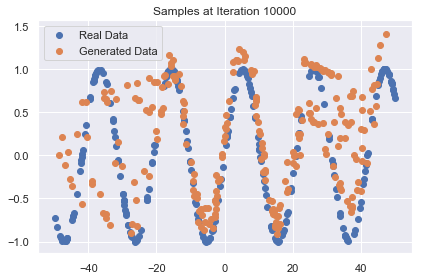

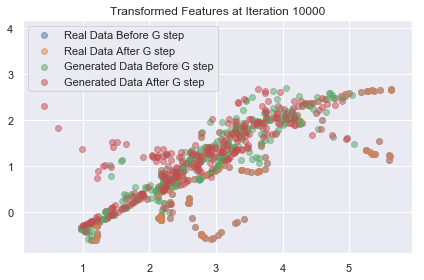

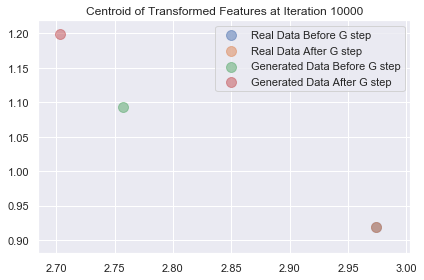

In [8]:
# sess = tf.Session(config=config)
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
nd_steps = 10
ng_steps = 10

x_plot = sample_data(n=batch_size)

for i in range(10001):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(nd_steps):
        _, dloss = sess.run([disc_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    rrep_dstep, grep_dstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], feed_dict={Z: Z_batch})

    rrep_gstep, grep_gstep = sess.run([r_rep, g_rep], feed_dict={X: X_batch, Z: Z_batch})

    print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,dloss,gloss))
    
    if i%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
     

        plt.figure()
        rrd = plt.scatter(rrep_dstep[:,0], rrep_dstep[:,1], alpha=0.5)
        rrg = plt.scatter(rrep_gstep[:,0], rrep_gstep[:,1], alpha=0.5)
        grd = plt.scatter(grep_dstep[:,0], grep_dstep[:,1], alpha=0.5)
        grg = plt.scatter(grep_gstep[:,0], grep_gstep[:,1], alpha=0.5)


        plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
        plt.title('Transformed Features at Iteration %d'%i)
        plt.tight_layout()
       
       

        plt.figure()

        rrdc = plt.scatter(np.mean(rrep_dstep[:,0]), np.mean(rrep_dstep[:,1]),s=100, alpha=0.5)
        rrgc = plt.scatter(np.mean(rrep_gstep[:,0]), np.mean(rrep_gstep[:,1]),s=100, alpha=0.5)
        grdc = plt.scatter(np.mean(grep_dstep[:,0]), np.mean(grep_dstep[:,1]),s=100, alpha=0.5)
        grgc = plt.scatter(np.mean(grep_gstep[:,0]), np.mean(grep_gstep[:,1]),s=100, alpha=0.5)

        plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

        plt.title('Centroid of Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        plt.show()